<a href="https://colab.research.google.com/github/echoheqian/drug-target-master/blob/main/0613.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')
sys.setrecursionlimit(1000000)

In [ ]:
# set a seed for code reproducibility
SEED = 7
np.random.seed(SEED)
pd.set_option('display.max_columns', 180)

In [ ]:
# 2.1 Loading data
df = (pd.read_csv('pheno.prs.0613.csv', sep="\t"))
        #.query('dm_trial==True')
        #.drop('dm_trial', axis=1))
df.shape

(16588, 437)

In [ ]:
# define cvd incidece rate #or x['isch_stroke']==1 or x['hemo_stroke']==1
def get_cvd_type(x):
  if x['mi'] == 1 or x['chd'] ==1 or x['chf'] ==1 or x['mitotal'] or x['psmi'] or x['dsmi']:
    return 1
  else:
    return 0
df.loc[:, 'cvd_binary'] = df.apply(get_cvd_type, axis=1)
print(df['cvd_binary'].value_counts())

0    14318
1     2270
Name: cvd_binary, dtype: int64


In [ ]:
# change missing values of -9 defined previously
df['baseline_sleep'].replace(-9, np.nan, inplace = True)

In [ ]:
# 2.2 detecting missing values
## define count missing values function
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
df['cvd_binary'].value_counts()

0    14318
1     2270
Name: cvd_binary, dtype: int64

In [ ]:
## count missing values
df_missing = missing_values_table(df)
df_missing

Your selected dataframe has 438 columns.
There are 330 columns that have missing values.


,Missing Values,% of Total Values
WELBEING,16588,100.0
delta_update_hsCRP,16588,100.0
HELPCC,16584,100.0
OVRYCA55,16533,99.7
COLON10Y,16513,99.5
...,...,...
ENDO_F2,3,0.0
sbp,2,0.0
HYST,1,0.0
MI,1,0.0


In [ ]:
# detect missing values >40%
df_50_missing = df_missing[df_missing['% of Total Values'] > 50]
df_50_missing.index

Index(['WELBEING', 'delta_update_hsCRP', 'HELPCC', 'OVRYCA55', 'COLON10Y',
       'PEACC1M', 'MELAN10Y', 'PE6M', 'ENDOCA55', 'ENDO10Y',
       'delta_update_ldl', 'delta_update_hdl', 'delta_update_tg',
       'delta_update_chol', 'BRCA55', 'delta_update_glu', 'STROKE6M',
       'INSULINW', 'HORMBK', 'PADANGP', 'PADANGGR', 'PADSURG', 'F45STRYR',
       'DVTACC1M', 'OVRTHYNW', 'DVT6M', 'TIA6M', 'GOITERNW', 'NODULENW',
       'MIAGE', 'MI6M', 'FAMILYPENUM', 'F45MVYR', 'ANGNPILN', 'DIABNW',
       'DIABPILL', 'DIABAGE', 'DIABCOMA', 'DBDIETF2', 'INSULIN',
       'FAMILYDVTNUM', 'UNDTHYNW', 'GALLSTRM', 'GALLBSNW', 'CHF_F30', 'NACVD',
       'GALLBLRM', 'OVRTHY', 'NODULE', 'GOITER', 'UNDTHY', 'CARDREST',
       'F45OTHYR', 'HORM3M', 'HYPTPILN', 'HYPTAGE', 'F45MVMYR', 'HYPTPILL',
       'F393MSE', 'HYST3M', 'AGEHYST', 'HYSTAGE', 'ad', 'COLOFREL',
       'delta_update_bmi', 'time_to_ad', 'RHEUMAT', 'COLNSCDT',
       'delta_update_sbp', 'delta_update_dbp', 'delta_update_n3',
       'delta_updat

In [ ]:
## delete variables with missing values higher than 50%
missing_vars = df_50_missing.index
df_update = (df.drop(missing_vars,axis=1))

In [ ]:
# 更新数据集，删除fid,iid,subjid,visit_year,time_to_event之类的列
drop_cols = ['subjID','FID','IID','time_to_chd','time_to_isch_stroke','time_to_hemo_stroke','time_to_death','time_to_cvd_death','time_to_chf','time_to_dsmi','time_to_dvt','timme_to_psmi',
             'time_to_mitotal',
             'time_to_non_cvd_death','time_to_dm','time_to_mi','time_to_cancer','visit_year','SCORE_delta_sleep_p1_0.05','SCORE_delta_ces_d_p0.05_0.05',
             'SCORE_delta_sleep_p0.05_0.001','SCORE_baseline_sleep_p1_0.05','SCORE_igap_p0.05','SCORE_inso','SCORE_mdd','SCORE_igap',
             'SCORE_baseline_ces_d_p1e5','SCORE_baseline_sleep_p1e5','SCORE_baseline_ces_d_p1','sugar_pct_binary','sugar','SCORE_sugar_baseline_sleep_p0.05',
             'SCORE_sugar_baseline_sleep_p1','SCORE_sugar_baseline_sleep_p1e5','SCORE_sugar_baseline_mse_p1','SCORE_sugar_baseline_mse_p0.05',
             'SCORE_sugar_baseline_mse_p1e5','SCORE_sugar_baseline_ces_d_p1','SCORE_sugar_baseline_ces_d_p0.05','SCORE_sugar_baseline_ces_d_p1e5','race','sex',
             'MENSELST','MEALOUT','DIAB']
df_update1= (df_update.drop(columns=drop_cols))
df_update1.head()

,cancer,SCORE_baseline_sleep_p0.05_0.05,sugar_pct,baseline_sugar,SCORE_inso_all_group,baseline_sleep,baseline_tot_cal,baseline_fat,baseline_pro,baseline_cho,baseline_sfa,baseline_mufa,baseline_pufa,baseline_alc,baseline_palm,baseline_n3,hei,myhei,age,BRCA_F2,COLON_F2,ENDO_F2,SKIN_F2,MELAN_F2,OTHCA10Y,HORM,HORMNW,OSTEOBK,HYST,MALDIET,LFDIETF2,DVT,PE,STROKE,TIA,MI,SCANEMIA,CHF_F2,LIVERDIS,BLDPROB,L15LBS6M,DIALYSIS,OTHCHRON,HARDSTDY,COMECC,HORMSTAT,DIABTRT,dm_trial,dm_intervention,ht_trial,ht_intervention,cad_trial,cad_intervention,EDUC,NOTWRK,RETIRED,HOMEMKR,EMPLOYED,DISABLED,OTHWRK,JOBHMMKR,JOBMANGR,JOBTECH,JOBSERV,JOBLABOR,JOBOTH,MARITAL,PEDUC,INCOME,CAREPROV,ABNPAP3Y,CERVDYS,MAINJOB,HOSP2Y,GLAUCOMA,CATARACT,HICHOLRP,ASTHMA,EMPHYSEM,KIDNEYST,HIBLDCA,STOMULCR,DIVERTIC,COLITIS,LUPUS,PANCREAT,OSTEOPOR,HIPREP,OTHJREP,INTESTRM,...,sbp,dbp,bmi,hsCRP,glu,hdl,insu,ldl,chol,tg,RECENCY,OC,DES,DMPA,TOTE,TOTP,TOTH,TEST,ESTR,F45VITA,F45VITE,F45VITB1,F45VTB12,F45VITB2,F45VITB6,F45BETA,F45BIOT,F45VITC,F45CALC,F45CHROM,F45COPP,F45VITD,F45FOLIC,F45IRON,F45MAGN,F45MANG,F45MOLYB,F45NIAC,F45PANTO,F45RETIN,F45SELEN,F45ZINC,F45MULTI,F45MVMIN,F45STRES,F45OTHCM,F45COMBP,F45CALCY,LIFEQUAL,SATLIFE,GENHEL,HLTHC1Y,VIGACT,MODACT,LIFTGROC,HRSSLP,EMOLIMIT,EMOWELL,ENERFAT,HOSTIL,GENHLTH,LFEVENT1,LIVALOR,NEGEMOT,OPTIMISM,PAIN,PSHTDEP,SLPDSTRB,SOCFUNC,SOCSTRN,SOCSUPP,SYMPTOM,chd,isch_stroke,hemo_stroke,death,cvd_death,non_cvd_death,dm,mi,chf,dsmi,dvt,psmi,mitotal,PHYSFUN,delta_sleep,delta_ces_d,foup_ces_d,cvd_binary
0,0,567.877,0.284184,206.73807,0.000188,5.0,2909.92283,81.95551,117.69064,443.34403,31.21059,26.43309,17.67438,0.00634,15.89256,2.01256,77.25781,0.004285,59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,amind,0.0,amind,False,False,True,False,True,False,9.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,5.0,1.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,115.0,80.0,35.62579,7.10,265.0,68.0,113.0,185.0,283.0,151.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,342.857,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.0,0.000,0.000,0.000,0,0,0,0,0,3.00,8.0,5.0,3.0,4.0,2.0,3.0,3.0,2.0,100.0,60.0,75.0,3.0,75.0,5.0,1.0,3.50,26.0,87.5,0.07820,5.0,100.0,4.0,37.0,0.11765,1,0,0,1,0,1,1,0,0,0,0,0,0,85.0,NaN,NaN,NaN,1
1,0,557.363,0.141641,53.98778,0.000207,7.0,1524.63584,66.72611,60.70822,155.72613,13.92200,24.03499,23.54255,10.01349,8.64331,2.54322,63.98034,-0.003884,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,amind,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,amind,0.0,0.0,True,True,True,True,True,True,7.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,6.0,5.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,125.0,84.0,41.22847,13.68,104.0,36.0,70.0,149.0,215.0,150.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.0,0.000,0.000,0.000,0,0,0,0,0,NaN,9.0,9.0,3.0,4.0,1.0,3.0,3.0,1.0,100.0,84.0,25.0,4.0,70.0,1.0,0.0,3.50,23.0,50.0,0.00144,7.0,100.0,10.0,34.0,0.38235,0,0,0,0,0,0,0,0,0,0,0,0,0,85.0,-4.0,0.00000,0.00144,0
2,0,545.961,0.209902,64.46801,0.000162,5.0,1228.53449,40.19991,58.67646,160.10975,13.59158,14.54817,8.02075,0.00493,7.44353,0.82732,67.62396,-0.005394,70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,amind,0.0,0.0,True,False,True,False,True,False,6.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,7.0,4.0,1.0,0.0,0.0,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,176.0,92.0,22.30924,0.25,84.0,73.0,NaN,203.0,288.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,642.857,12.857,0.643,2.571,0.729,0.857,1928.571,0.0,25.714,69.429,0.0,0.857,4.286,171.429,7.714,42.857,0.0,0.0,8.571,0.0,321.429,8.571,6.429,0,1,0,0,1,1.50,10.0,10.0,1.0,2.0,2.0,3.0,3.0,2.0,100.0,80.0,80.0,8.0,90.0,0.0,0.0,2.

In [ ]:
# get column names of missing variables
missing_variables = df_update1.isnull().columns
print(missing_variables)

Index(['cancer', 'SCORE_baseline_sleep_p0.05_0.05', 'sugar_pct',
       'baseline_sugar', 'SCORE_inso_all_group', 'baseline_sleep',
       'baseline_tot_cal', 'baseline_fat', 'baseline_pro', 'baseline_cho',
       ...
       'chf', 'dsmi', 'dvt', 'psmi', 'mitotal', 'PHYSFUN', 'delta_sleep',
       'delta_ces_d', 'foup_ces_d', 'cvd_binary'],
      dtype='object', length=310)


In [ ]:
# 可视化缺失值
import matplotlib.pyplot as plt
import pylab as pl
# 统计缺失值数量
missing=df_update1.isnull().sum().reset_index().rename(columns={0:'missNum'})
# 计算缺失比例
missing['missRate']=missing['missNum']/df_update1.shape[0]
# 按照缺失率排序显示
miss_analy=missing[missing.missRate>0].sort_values(by='missRate',ascending=False)
# miss_analy 存储的是每个变量缺失情况的数据框

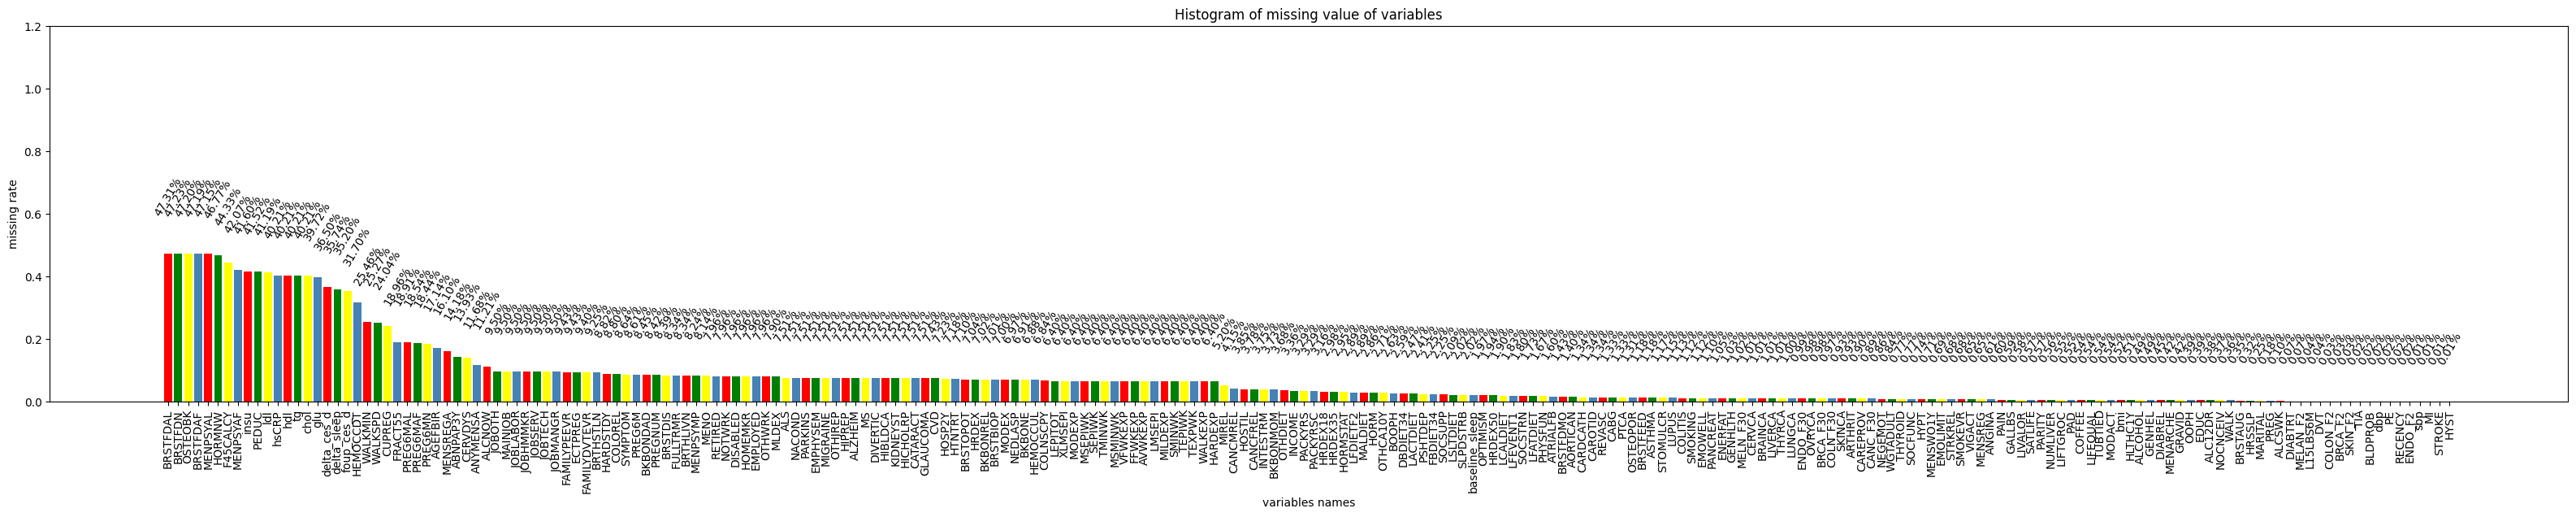

In [ ]:
fig = plt.figure(figsize=(40,6))
plt.bar(np.arange(miss_analy.shape[0]), list(miss_analy.missRate.values), align = 'center',
        color=['red','green','yellow','steelblue'])

plt.title('Histogram of missing value of variables')
plt.xlabel('variables names')
plt.ylabel('missing rate')
# 添加x轴标签，并旋转90度
plt.xticks(np.arange(miss_analy.shape[0]),list(miss_analy['index']))
pl.xticks(rotation=90)
# 添加数值显示
for x,y in enumerate(list(miss_analy.missRate.values)):
    plt.text(x,y+0.12,'{:.2%}'.format(y),ha='center',rotation=60)
plt.ylim([0,1.2])

plt.show()

In [ ]:
# 查看缺失值的数据类型，为后续不同类型填充策略做准备
missing_variables = df_update1.columns[df_update1.isnull().any()]
missing_df = df_update1[missing_variables]

In [ ]:
missing_df.dtypes.value_counts()

float64    209
object      21
dtype: int64

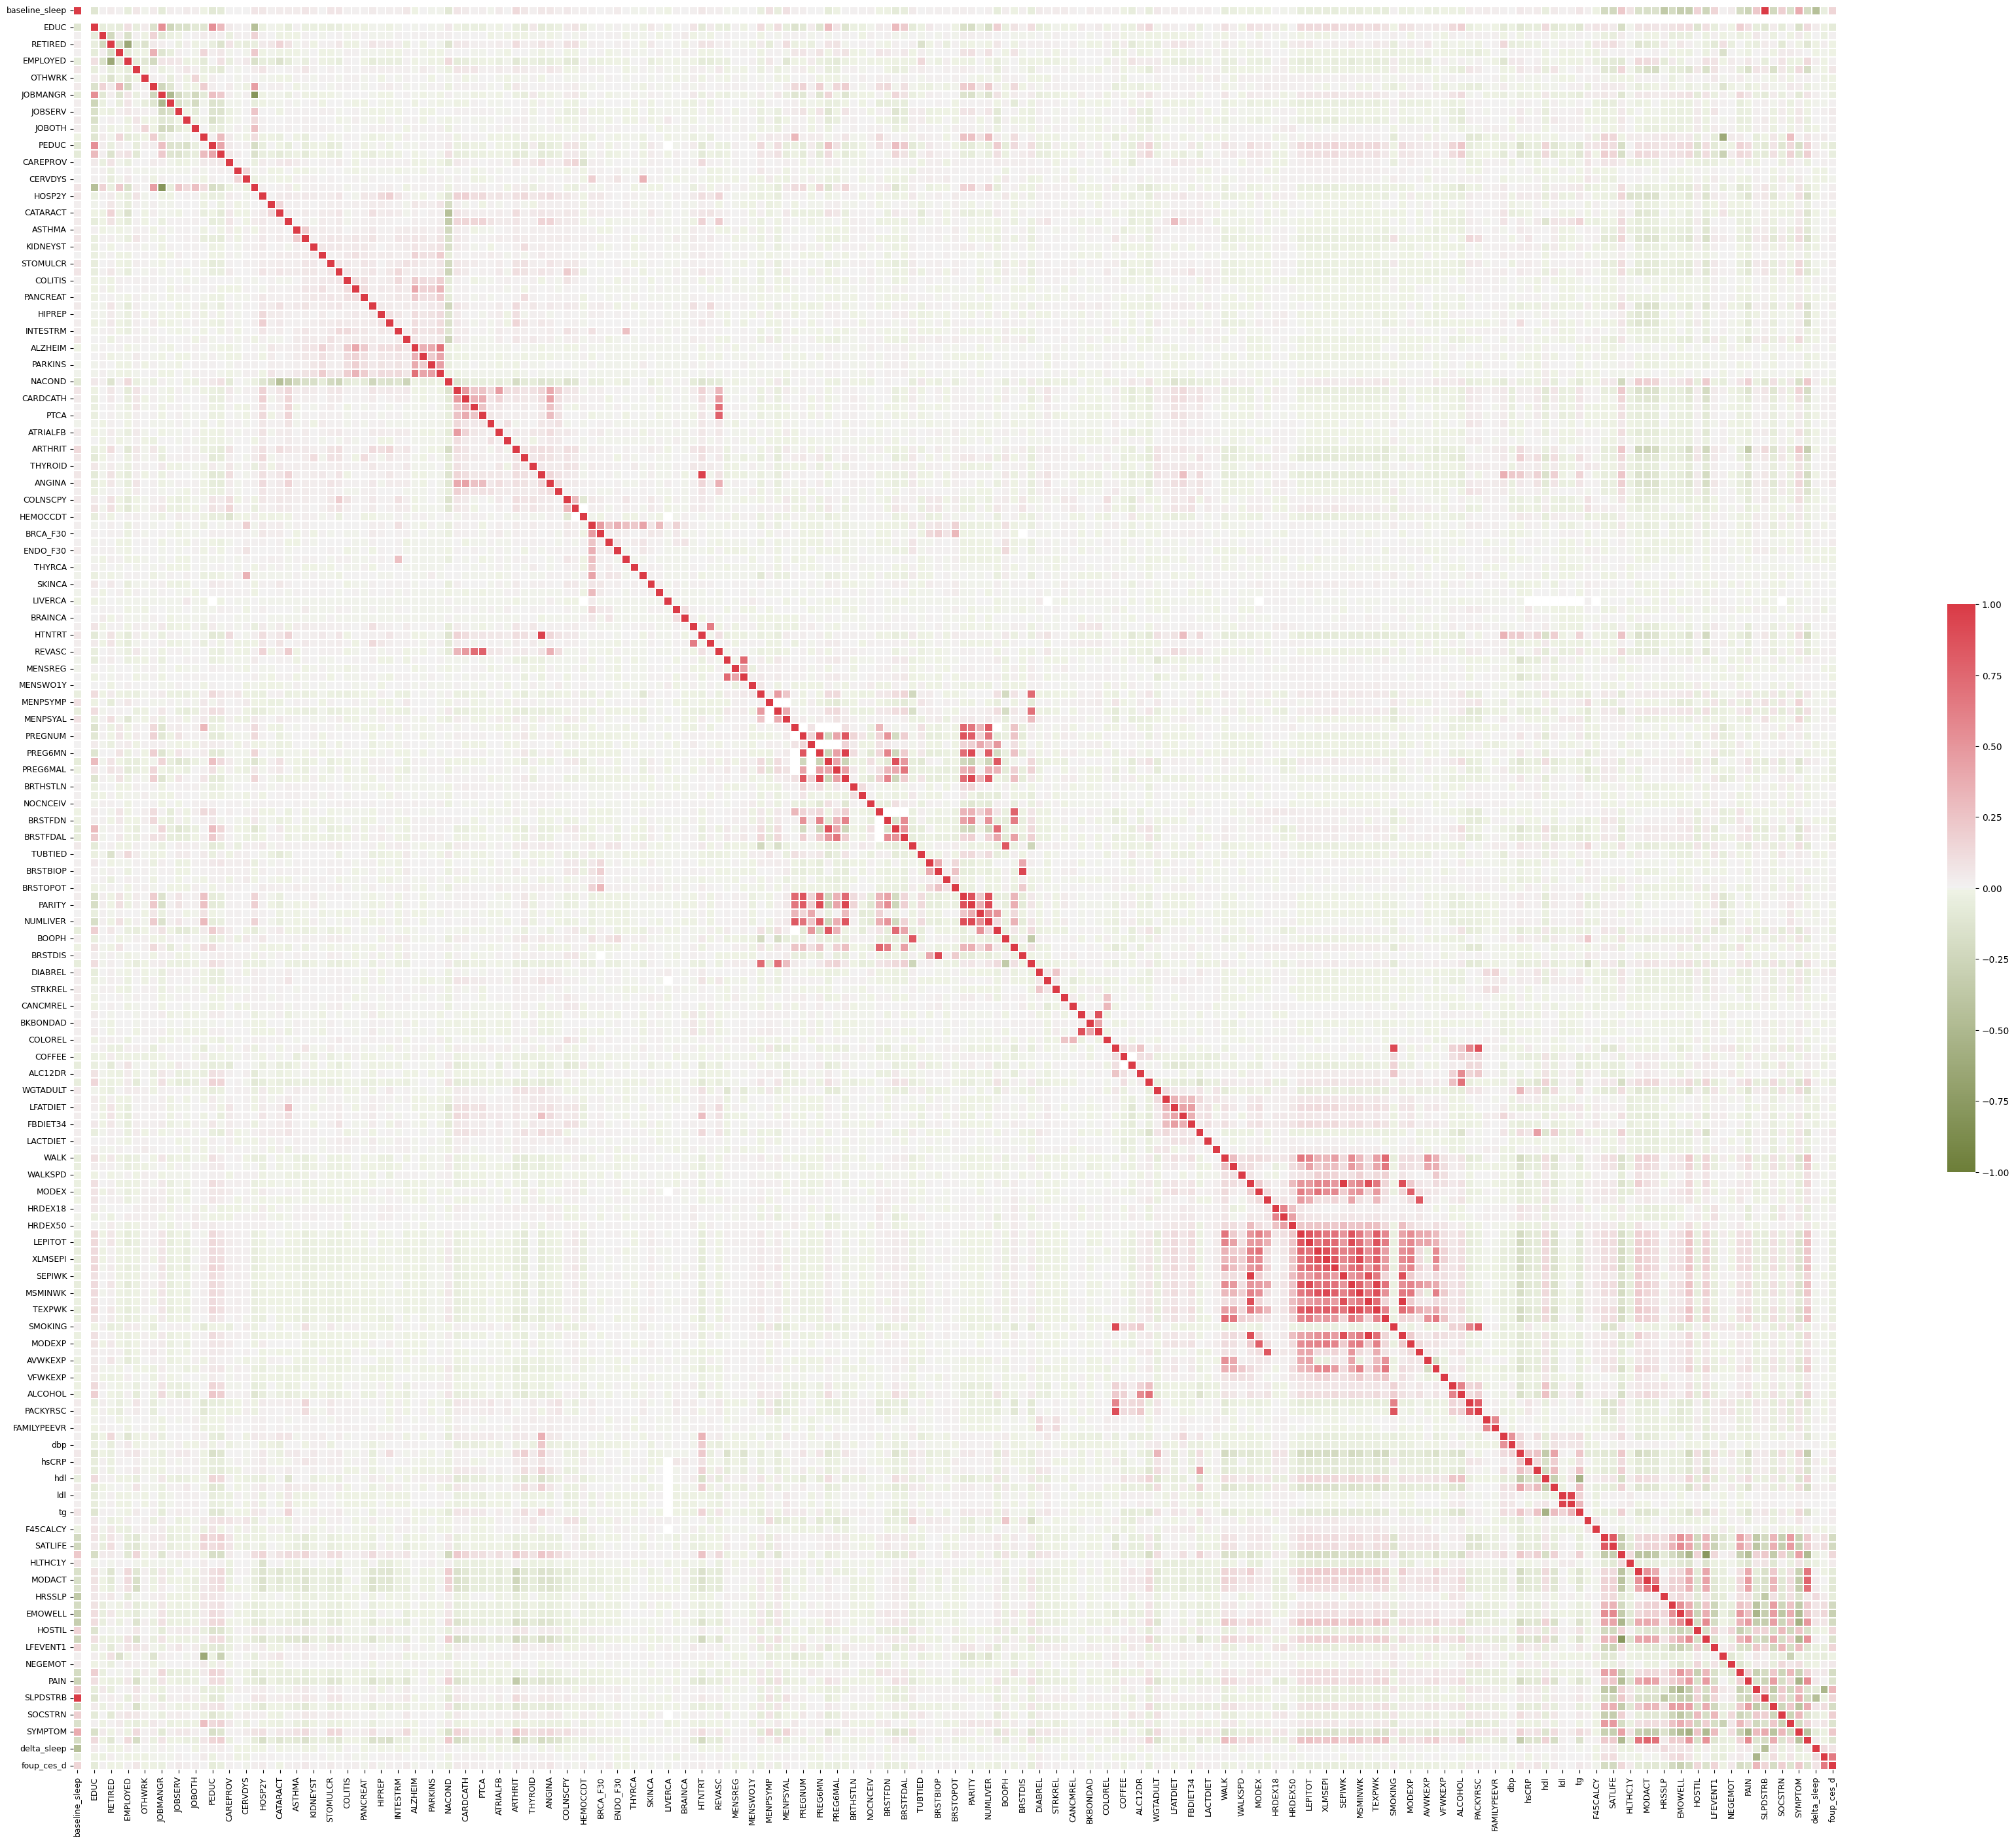

In [ ]:
# 定义热图函数，查看不同缺失值之间的关联
def HeatMap(df, x=True):
  correlations = df.corr()
  ## creat color map ranging between two colors
  ## diverging_palette()为创建两种颜色过渡色板
  cmap = sns.diverging_palette(100, 10,as_cmap=True)
  fig, ax = plt.subplots(figsize=(35,35))
  ## heatmap中参数: vmin和vmax定义图卡颜色，用于锚定颜色图的值
  # cmap 颜色映射名称或对象; fmt 添加注释时要使用的字符串格式化代码
  #fmt='.2f',当Annot为TRUE时才有用，显示数值的小数点位数
  fig = sns.heatmap(correlations, cmap=cmap, vmax=1.0, vmin=-1.0,
                    square=True,linewidths=.05,
                    annot=False, cbar_kws={'shrink': .25})
                   #mask = abs(correlations) <0.9 )
  fig.set_xticklabels(fig.get_xticklabels(), rotation = 90, fontsize = 9)
  fig.set_yticklabels(fig.get_yticklabels(), rotation = 0, fontsize = 9)
  plt.tight_layout()
  plt.show()
HeatMap(missing_df,x=True)

In [ ]:
#查看缺失值之间的关联性，删除关联系数 >0.9的变量
missing_cor = missing_df.corr()
sub_missing_cor = []
for index in missing_cor.index:
  for i in range(len(missing_cor.loc[index].values)):
     if((missing_cor.loc[index].values[i] >= 0.9) & (missing_cor.loc[index].values[i]<1)):
 #sub = missing_cor.where((np.abs(missing_cor[i]).isin(0.9,1), print(missing_cor.loc[i,i])))
     #sub_missing_cor.append(sub)
        print(index, i)
        print(missing_cor.loc[index].values[i])

In [ ]:
#'HTNTRT','BRTHLIVN','PARITY','BRSTDIS','SMOKING','NUMLIVER','SEPIWK','TMINWK','TEXPWK','HARDEXP'
#df_update1 = (df_update1.drop(columns=['MSMINWK']))

In [ ]:
# 查看缺失值的数据类型，为后续不同类型填充策略做准备
missing_variables = df_update1.columns[df_update1.isnull().any()]
missing_df =  df_update1[missing_variables]
#HeatMap(missing_df,x=True)

In [ ]:
missing_values_table(df_update1)

Your selected dataframe has 310 columns.
There are 230 columns that have missing values.


,Missing Values,% of Total Values
BRSTFDAL,7848,47.3
BRSTFDN,7834,47.2
OSTEOBK,7829,47.2
BRSTFDAF,7828,47.2
MENPSYAL,7821,47.1
...,...,...
ENDO_F2,3,0.0
sbp,2,0.0
MI,1,0.0
STROKE,1,0.0


In [ ]:
df_update1['cvd_binary'].value_counts()

0    14318
1     2270
Name: cvd_binary, dtype: int64

In [ ]:
### 将缺失列中的文本数据填充为NAN为连续变量插入缺失值
df_update2 = df_update1.replace('amind', 1)
df_update3 = df_update2.replace('asian',np.nan)
df_update3[missing_variables].dtypes.value_counts()

float64    209
object      21
dtype: int64

In [ ]:
## count missing values
df3_missing = missing_values_table(df_update3)
df3_missing

Your selected dataframe has 310 columns.
There are 230 columns that have missing values.


,Missing Values,% of Total Values
BRSTFDAL,7848,47.3
BRSTFDN,7834,47.2
OSTEOBK,7829,47.2
BRSTFDAF,7828,47.2
MENPSYAL,7821,47.1
...,...,...
ENDO_F2,3,0.0
sbp,2,0.0
MI,1,0.0
STROKE,1,0.0


In [ ]:
# detect missing values >40%
df3_40_missing = df3_missing[df3_missing['% of Total Values'] > 50]
df3_40_missing.index

Index([], dtype='object')

In [ ]:
## delete variables with missing values higher than 50%
missing_vars = df3_40_missing.index
df_update4 = (df_update3.drop(missing_vars,axis=1))

In [ ]:
missing_values_table(df_update4)

Your selected dataframe has 310 columns.
There are 230 columns that have missing values.


,Missing Values,% of Total Values
BRSTFDAL,7848,47.3
BRSTFDN,7834,47.2
OSTEOBK,7829,47.2
BRSTFDAF,7828,47.2
MENPSYAL,7821,47.1
...,...,...
ENDO_F2,3,0.0
sbp,2,0.0
MI,1,0.0
STROKE,1,0.0


In [ ]:
df_update4.to_csv('pheno.prs.0607.csv', sep=",", index = False)

In [ ]:
df_update4 = pd.read_csv('pheno.prs.0531.csv', sep=",")

## 缺失值填充

In [ ]:
## 将连续变量和分类变量分开填充
## example
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.base import TransformerMixin

In [ ]:
missing_variables = df_update4.columns[df_update4.isnull().any()]
missing_df =  df_update4[missing_variables]

#### 缺失值填充（方法一）通过变量类型填充缺失值

In [ ]:
 missing = missing_values_table(df_update4)
 missing

Your selected dataframe has 310 columns.
There are 230 columns that have missing values.


,Missing Values,% of Total Values
BRSTFDAL,7848,47.3
BRSTFDN,7834,47.2
OSTEOBK,7829,47.2
BRSTFDAF,7828,47.2
MENPSYAL,7821,47.1
...,...,...
ENDO_F2,3,0.0
sbp,2,0.0
MI,1,0.0
STROKE,1,0.0


In [ ]:
df_update4.isna().sum().sort_values(ascending=False)

BRSTFDAL                           7848
BRSTFDN                            7834
OSTEOBK                            7829
BRSTFDAF                           7828
MENPSYAL                           7821
                                   ... 
DMPA                                  0
DES                                   0
OC                                    0
SCORE_baseline_sleep_p0.05_0.05       0
cvd_binary                            0
Length: 310, dtype: int64

In [ ]:
df_update4.head()

,cancer,SCORE_baseline_sleep_p0.05_0.05,sugar_pct,baseline_sugar,SCORE_inso_all_group,baseline_sleep,baseline_tot_cal,baseline_fat,baseline_pro,baseline_cho,baseline_sfa,baseline_mufa,baseline_pufa,baseline_alc,baseline_palm,baseline_n3,hei,myhei,age,BRCA_F2,COLON_F2,ENDO_F2,SKIN_F2,MELAN_F2,OTHCA10Y,HORM,HORMNW,OSTEOBK,HYST,MALDIET,LFDIETF2,DVT,PE,STROKE,TIA,MI,SCANEMIA,CHF_F2,LIVERDIS,BLDPROB,L15LBS6M,DIALYSIS,OTHCHRON,HARDSTDY,COMECC,HORMSTAT,DIABTRT,dm_trial,dm_intervention,ht_trial,ht_intervention,cad_trial,cad_intervention,EDUC,NOTWRK,RETIRED,HOMEMKR,EMPLOYED,DISABLED,OTHWRK,JOBHMMKR,JOBMANGR,JOBTECH,JOBSERV,JOBLABOR,JOBOTH,MARITAL,PEDUC,INCOME,CAREPROV,ABNPAP3Y,CERVDYS,MAINJOB,HOSP2Y,GLAUCOMA,CATARACT,HICHOLRP,ASTHMA,EMPHYSEM,KIDNEYST,HIBLDCA,STOMULCR,DIVERTIC,COLITIS,LUPUS,PANCREAT,OSTEOPOR,HIPREP,OTHJREP,INTESTRM,...,sbp,dbp,bmi,hsCRP,glu,hdl,insu,ldl,chol,tg,RECENCY,OC,DES,DMPA,TOTE,TOTP,TOTH,TEST,ESTR,F45VITA,F45VITE,F45VITB1,F45VTB12,F45VITB2,F45VITB6,F45BETA,F45BIOT,F45VITC,F45CALC,F45CHROM,F45COPP,F45VITD,F45FOLIC,F45IRON,F45MAGN,F45MANG,F45MOLYB,F45NIAC,F45PANTO,F45RETIN,F45SELEN,F45ZINC,F45MULTI,F45MVMIN,F45STRES,F45OTHCM,F45COMBP,F45CALCY,LIFEQUAL,SATLIFE,GENHEL,HLTHC1Y,VIGACT,MODACT,LIFTGROC,HRSSLP,EMOLIMIT,EMOWELL,ENERFAT,HOSTIL,GENHLTH,LFEVENT1,LIVALOR,NEGEMOT,OPTIMISM,PAIN,PSHTDEP,SLPDSTRB,SOCFUNC,SOCSTRN,SOCSUPP,SYMPTOM,chd,isch_stroke,hemo_stroke,death,cvd_death,non_cvd_death,dm,mi,chf,dsmi,dvt,psmi,mitotal,PHYSFUN,delta_sleep,delta_ces_d,foup_ces_d,cvd_binary
0,0,567.877,0.284184,206.73807,0.000188,5.0,2909.92283,81.95551,117.69064,443.34403,31.21059,26.43309,17.67438,0.00634,15.89256,2.01256,77.25781,0.004285,59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,1,False,False,True,False,True,False,9.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,5.0,1.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,115.0,80.0,35.62579,7.10,265.0,68.0,113.0,185.0,283.0,151.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,342.857,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.0,0.000,0.000,0.000,0,0,0,0,0,3.00,8.0,5.0,3.0,4.0,2.0,3.0,3.0,2.0,100.0,60.0,75.0,3.0,75.0,5.0,1.0,3.50,26.0,87.5,0.07820,5.0,100.0,4.0,37.0,0.11765,1,0,0,1,0,1,1,0,0,0,0,0,0,85.0,NaN,NaN,NaN,1
1,0,557.363,0.141641,53.98778,0.000207,7.0,1524.63584,66.72611,60.70822,155.72613,13.92200,24.03499,23.54255,10.01349,8.64331,2.54322,63.98034,-0.003884,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,True,True,True,True,True,True,7.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,6.0,5.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,125.0,84.0,41.22847,13.68,104.0,36.0,70.0,149.0,215.0,150.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.0,0.000,0.000,0.000,0,0,0,0,0,NaN,9.0,9.0,3.0,4.0,1.0,3.0,3.0,1.0,100.0,84.0,25.0,4.0,70.0,1.0,0.0,3.50,23.0,50.0,0.00144,7.0,100.0,10.0,34.0,0.38235,0,0,0,0,0,0,0,0,0,0,0,0,0,85.0,-4.0,0.00000,0.00144,0
2,0,545.961,0.209902,64.46801,0.000162,5.0,1228.53449,40.19991,58.67646,160.10975,13.59158,14.54817,8.02075,0.00493,7.44353,0.82732,67.62396,-0.005394,70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,True,False,True,False,True,False,6.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,7.0,4.0,1.0,0.0,0.0,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,176.0,92.0,22.30924,0.25,84.0,73.0,NaN,203.0,288.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,642.857,12.857,0.643,2.571,0.729,0.857,1928.571,0.0,25.714,69.429,0.0,0.857,4.286,171.429,7.714,42.857,0.0,0.0,8.571,0.0,321.429,8.571,6.429,0,1,0,0,1,1.50,10.0,10.0,1.0,2.0,2.0,3.0,3.0,2.0,100.0,80.0,80.0,8.0,90.0,0.0,0.0,2.75,20.0,100.0,0.0055

In [ ]:
### 区分数据中的数值变量和离散变量，对不同的变量类型分别采用不同的填充策略
## O_index:   数值变量列名
##C :离散变量列名
def distinguish_Char_Num(DataFrame_data):
  import copy
  m, n = DataFrame_data.shape
  O = []
  C = []
  data = copy.deepcopy(DataFrame_data)
  for i in range(n):
    try:
      if isinstance(data.iloc[0, i], int) or isinstance(data.iloc[0, i], float) or isinstance(data.iloc[0, i],  np.float64)  or isinstance(data.iloc[0, i], np.int64) or isinstance(data.iloc[0, i], np.int32):
          O.append(i)
      elif isinstance(data.iloc[0, i], object):
          C.append(i)
      else:
            raise ValueError("the %d colum of data is ot a umber or object")
    except TypeError as e:
          print(e)
  O_data = copy.deepcopy(data.iloc[:, O])
  C_data = copy.deepcopy(data.iloc[:, C])
  O_index = O_data.columns.tolist()
  C_index = C_data.columns.tolist()
  return O_index, C_index
# 取得两类变量类型的名称
O_index, C_index = distinguish_Char_Num(df_update4[missing_variables])
# 连续变量
O_index
# 离散变量
C_index

In [ ]:
C_index

['BRCA_F2',
 'COLON_F2',
 'ENDO_F2',
 'SKIN_F2',
 'MELAN_F2',
 'OTHCA10Y',
 'HORM',
 'HYST',
 'MALDIET',
 'LFDIETF2',
 'DVT',
 'PE',
 'STROKE',
 'TIA',
 'MI',
 'BLDPROB',
 'L15LBS6M',
 'HORMSTAT']

In [ ]:
df_update4.iloc[:,1].unique()

array([567.877, 557.363, 545.961, ..., 549.933, 525.785, 555.531])

###### 缺失值填充（方法二）通过变量数值的数量填充

In [ ]:
### 方法二： 区分数据中的数值变量和离散变量，对不同的变量类型分别采用不同的填充策略
def check_var(DataFrame_data):
  import copy
  m, n = DataFrame_data.shape
  O1 = []
  C1 = []
  data = copy.deepcopy(DataFrame_data)
  for i in range(n):
      if len(data.iloc[:,i].unique()) > 13:
          O1.append(i)
      else:
          C1.append(i)
  O1_data = copy.deepcopy(data.iloc[:, O1])
  C1_data = copy.deepcopy(data.iloc[:, C1])
  O1_index = O1_data.columns.tolist()
  C1_index = C1_data.columns.tolist()
  return O1_index, C1_index
# 取得两类变量类型的名称
O1_index, C1_index = check_var(df_update4[missing_variables])
# 连续变量
print(O1_index)
# 离散变量
print(C1_index)

['baseline_sleep', 'ANYMENSA', 'MENPSYAF', 'MENPSYAL', 'MENO', 'TEPIWK', 'LEPITOT', 'MSEPIWK', 'XLMSEPI', 'TMINWK', 'MSMINWK', 'SMINWK', 'TEXPWK', 'WALKEXP', 'HARDEXP', 'MODEXP', 'MILDEXP', 'AVWKEXP', 'FFWKEXP', 'VFWKEXP', 'ALCSWK', 'PACKYRS', 'sbp', 'dbp', 'bmi', 'hsCRP', 'glu', 'hdl', 'insu', 'ldl', 'chol', 'tg', 'F45CALCY', 'EMOWELL', 'ENERFAT', 'HOSTIL', 'GENHLTH', 'NEGEMOT', 'OPTIMISM', 'PSHTDEP', 'SLPDSTRB', 'SOCSTRN', 'SOCSUPP', 'SYMPTOM', 'PHYSFUN', 'delta_sleep', 'delta_ces_d', 'foup_ces_d']
['BRCA_F2', 'COLON_F2', 'ENDO_F2', 'SKIN_F2', 'MELAN_F2', 'OTHCA10Y', 'HORM', 'HORMNW', 'OSTEOBK', 'HYST', 'MALDIET', 'LFDIETF2', 'DVT', 'PE', 'STROKE', 'TIA', 'MI', 'BLDPROB', 'L15LBS6M', 'HARDSTDY', 'HORMSTAT', 'DIABTRT', 'EDUC', 'NOTWRK', 'RETIRED', 'HOMEMKR', 'EMPLOYED', 'DISABLED', 'OTHWRK', 'JOBHMMKR', 'JOBMANGR', 'JOBTECH', 'JOBSERV', 'JOBLABOR', 'JOBOTH', 'MARITAL', 'PEDUC', 'INCOME', 'CAREPROV', 'ABNPAP3Y', 'CERVDYS', 'MAINJOB', 'HOSP2Y', 'GLAUCOMA', 'CATARACT', 'HICHOLRP', 'ASTHM

In [ ]:
df_update4[missing_variables].dtypes.value_counts()

float64    209
object      21
dtype: int64

In [ ]:
# 填补缺失值数据类型为OBJECT类型的分类变量数据，填补的方法为填充为类别多的值
#class DataFrameImputer(TransformerMixin):
#  def _init_(self):
#    """Impute missing values.
#     Columns of dype object are imputed with MICE category variables in columns.
#     Columns of float types are imputed with MICE continueous variables in columns.
#    """
#  def fit(self, X, y=None):
#      self.fill = pd.Series([X[c].value_counts().index[0]
#                      if X[c].dtypes == 'object' else np.nan for c in X],
#                      index = X.columns)
#
#      return self

#  def transform(self, X, Y=None):
#        return X.fillna(self.fill)
#xt_obj_complete = DataFrameImputer().fit_transform(df_update4)
#xt_obj_complete.dtypes.value_counts()


In [ ]:
#missing_values_table(xt_obj_complete)

####2）填补为类别分类变量的缺失值，采用中位数填补

In [ ]:
# 全组中没有FAT DOWN的变量，只有DM组中才有FAT——DOWN的变量
df_update4['fat_down']= df_update4['fat_down'].fillna(0)

In [ ]:
df_update4['fat_down']= df_update4['fat_down'].astype(int)

In [ ]:
i = ['dm_intervention','ht_trial','ht_intervention','cad_trial','cad_intervention','dm_trial']
for col in i:
 df_update4[col]= df_update4[col].astype(int)

In [ ]:
 df_update4.iloc[:,0].unique()

array([0, 1])

In [ ]:
df_update4.head()

In [ ]:
df_update4.dtypes.value_counts()

float64    258
int64       27
object      25
dtype: int64

In [ ]:
#df_update4['SOCFUNC'] = df_update4['SOCFUNC'].fillna((df_update4.loc[df_update4['SOCFUNC'].isnull() == False, 'SOCFUNC']).mode())

In [ ]:
# 打印出全部分类变量及相应众数的数值
for col_name in C1_index:
    print(df_update4.loc[df_update4[col_name].isnull() == False, col_name].mode())

In [ ]:
df_update4.head()

,cancer,SCORE_baseline_sleep_p0.05_0.05,sugar_pct,baseline_sugar,SCORE_inso_all_group,baseline_sleep,baseline_tot_cal,baseline_fat,baseline_pro,baseline_cho,baseline_sfa,baseline_mufa,baseline_pufa,baseline_alc,baseline_palm,baseline_n3,hei,myhei,age,BRCA_F2,COLON_F2,ENDO_F2,SKIN_F2,MELAN_F2,OTHCA10Y,HORM,HORMNW,OSTEOBK,HYST,MALDIET,LFDIETF2,DVT,PE,STROKE,TIA,MI,SCANEMIA,CHF_F2,LIVERDIS,BLDPROB,L15LBS6M,DIALYSIS,OTHCHRON,HARDSTDY,COMECC,HORMSTAT,DIABTRT,dm_trial,dm_intervention,ht_trial,ht_intervention,cad_trial,cad_intervention,EDUC,NOTWRK,RETIRED,HOMEMKR,EMPLOYED,DISABLED,OTHWRK,JOBHMMKR,JOBMANGR,JOBTECH,JOBSERV,JOBLABOR,JOBOTH,MARITAL,PEDUC,INCOME,CAREPROV,ABNPAP3Y,CERVDYS,MAINJOB,HOSP2Y,GLAUCOMA,CATARACT,HICHOLRP,ASTHMA,EMPHYSEM,KIDNEYST,HIBLDCA,STOMULCR,DIVERTIC,COLITIS,LUPUS,PANCREAT,OSTEOPOR,HIPREP,OTHJREP,INTESTRM,...,sbp,dbp,bmi,hsCRP,glu,hdl,insu,ldl,chol,tg,RECENCY,OC,DES,DMPA,TOTE,TOTP,TOTH,TEST,ESTR,F45VITA,F45VITE,F45VITB1,F45VTB12,F45VITB2,F45VITB6,F45BETA,F45BIOT,F45VITC,F45CALC,F45CHROM,F45COPP,F45VITD,F45FOLIC,F45IRON,F45MAGN,F45MANG,F45MOLYB,F45NIAC,F45PANTO,F45RETIN,F45SELEN,F45ZINC,F45MULTI,F45MVMIN,F45STRES,F45OTHCM,F45COMBP,F45CALCY,LIFEQUAL,SATLIFE,GENHEL,HLTHC1Y,VIGACT,MODACT,LIFTGROC,HRSSLP,EMOLIMIT,EMOWELL,ENERFAT,HOSTIL,GENHLTH,LFEVENT1,LIVALOR,NEGEMOT,OPTIMISM,PAIN,PSHTDEP,SLPDSTRB,SOCFUNC,SOCSTRN,SOCSUPP,SYMPTOM,chd,isch_stroke,hemo_stroke,death,cvd_death,non_cvd_death,dm,mi,chf,dsmi,dvt,psmi,mitotal,PHYSFUN,delta_sleep,delta_ces_d,foup_ces_d,cvd_binary
0,0,567.877,0.284184,206.73807,0.000188,5.0,2909.92283,81.95551,117.69064,443.34403,31.21059,26.43309,17.67438,0.00634,15.89256,2.01256,77.25781,0.004285,59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,1,0,0,1,0,1,0,9.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,115.0,80.0,35.62579,7.10,265.0,68.0,113.0,185.0,283.0,151.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,342.857,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.0,0.000,0.000,0.000,0,0,0,0,0,3.00,8.0,5.0,3.0,4.0,2.0,3.0,3.0,2.0,100.0,60.0,75.0,3.0,75.0,5.0,1.0,3.50,26.0,87.5,0.07820,5.0,100.0,4.0,37.0,0.11765,1,0,0,1,0,1,1,0,0,0,0,0,0,85.0,NaN,NaN,NaN,1
1,0,557.363,0.141641,53.98778,0.000207,7.0,1524.63584,66.72611,60.70822,155.72613,13.92200,24.03499,23.54255,10.01349,8.64331,2.54322,63.98034,-0.003884,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,1,1,1,1,1,1,7.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,6.0,5.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,125.0,84.0,41.22847,13.68,104.0,36.0,70.0,149.0,215.0,150.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.0,0.000,0.000,0.000,0,0,0,0,0,NaN,9.0,9.0,3.0,4.0,1.0,3.0,3.0,1.0,100.0,84.0,25.0,4.0,70.0,1.0,0.0,3.50,23.0,50.0,0.00144,7.0,100.0,10.0,34.0,0.38235,0,0,0,0,0,0,0,0,0,0,0,0,0,85.0,-4.0,0.00000,0.00144,0
2,0,545.961,0.209902,64.46801,0.000162,5.0,1228.53449,40.19991,58.67646,160.10975,13.59158,14.54817,8.02075,0.00493,7.44353,0.82732,67.62396,-0.005394,70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,1,0,1,0,1,0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,7.0,4.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,176.0,92.0,22.30924,0.25,84.0,73.0,NaN,203.0,288.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,642.857,12.857,0.643,2.571,0.729,0.857,1928.571,0.0,25.714,69.429,0.0,0.857,4.286,171.429,7.714,42.857,0.0,0.0,8.571,0.0,321.429,8.571,6.429,0,1,0,0,1,1.50,10.0,10.0,1.0,2.0,2.0,3.0,3.0,2.0,100.0,80.0,80.0,8.0,90.0,0.0,0.0,2.75,20.0,100.0,0.00552,5.0,100.0,10.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,95.0,-1.0,

#### 分类变量填补为中位数

In [ ]:
## 填补经UNIQUE判断出的分类变量数据，填补类型为中位数
# C1_index 为分类数据
print(C1_index)
for col_name in C1_index:
    #print(col_name)
     df_update4[col_name] = df_update4[col_name].fillna(df_update4.loc[df_update4[col_name].isnull() == False, col_name].median())

['BRCA_F2', 'COLON_F2', 'ENDO_F2', 'SKIN_F2', 'MELAN_F2', 'OTHCA10Y', 'HORM', 'HORMNW', 'OSTEOBK', 'HYST', 'MALDIET', 'LFDIETF2', 'DVT', 'PE', 'STROKE', 'TIA', 'MI', 'BLDPROB', 'L15LBS6M', 'HARDSTDY', 'HORMSTAT', 'DIABTRT', 'EDUC', 'NOTWRK', 'RETIRED', 'HOMEMKR', 'EMPLOYED', 'DISABLED', 'OTHWRK', 'JOBHMMKR', 'JOBMANGR', 'JOBTECH', 'JOBSERV', 'JOBLABOR', 'JOBOTH', 'MARITAL', 'PEDUC', 'INCOME', 'CAREPROV', 'ABNPAP3Y', 'CERVDYS', 'MAINJOB', 'HOSP2Y', 'GLAUCOMA', 'CATARACT', 'HICHOLRP', 'ASTHMA', 'EMPHYSEM', 'KIDNEYST', 'HIBLDCA', 'STOMULCR', 'DIVERTIC', 'COLITIS', 'LUPUS', 'PANCREAT', 'OSTEOPOR', 'HIPREP', 'OTHJREP', 'INTESTRM', 'MIGRAINE', 'ALZHEIM', 'MS', 'PARKINS', 'ALS', 'NACOND', 'CVD', 'CARDCATH', 'CABG', 'PTCA', 'CAROTID', 'ATRIALFB', 'AORTICAN', 'ARTHRIT', 'GALLBS', 'THYROID', 'HYPT', 'ANGINA', 'PAD', 'COLNSCPY', 'HEMOCCUL', 'HEMOCCDT', 'CANC_F30', 'BRCA_F30', 'OVRYCA', 'ENDO_F30', 'COLN_F30', 'THYRCA', 'CERVCA', 'SKINCA', 'MELN_F30', 'LIVERCA', 'LUNGCA', 'BRAINCA', 'BKBONE', 'HTN

####3）填补变量缺失率小与0.2的缺失值，采用均值填充

In [ ]:
 # 再核对一遍填充数据的效果
 missing = missing_values_table(df_update4)
 missing

Your selected dataframe has 310 columns.
There are 48 columns that have missing values.


,Missing Values,% of Total Values
MENPSYAL,7821,47.1
F45CALCY,7353,44.3
MENPSYAF,6979,42.1
insu,6900,41.6
ldl,6832,41.2
hdl,6670,40.2
hsCRP,6670,40.2
tg,6670,40.2
chol,6670,40.2
glu,6589,39.7


In [ ]:
### 采用均值填充缺失值比例<2%的连续变量
# 筛选出缺失值比例< 2%的变量，直接用均值填充
O1_index_low = missing[(missing['% of Total Values'] < 2) ].index
print(O1_index_low)
for col_name in O1_index_low:
      df_update4[col_name] = df_update4[col_name].fillna(df_update4.loc[df_update4[col_name].isnull() == False, col_name].mean())

Index(['SOCSTRN', 'PHYSFUN', 'EMOWELL', 'ENERFAT', 'GENHLTH', 'NEGEMOT', 'bmi',
       'ALCSWK', 'dbp', 'sbp'],
      dtype='object')


In [ ]:
# 核对一遍填充缺失值< 0.2数据的效果
missing_values_table(df_update4)

Your selected dataframe has 310 columns.
There are 38 columns that have missing values.


,Missing Values,% of Total Values
MENPSYAL,7821,47.1
F45CALCY,7353,44.3
MENPSYAF,6979,42.1
insu,6900,41.6
ldl,6832,41.2
hsCRP,6670,40.2
hdl,6670,40.2
tg,6670,40.2
chol,6670,40.2
glu,6589,39.7


In [ ]:
# time_to_ad在首次删除缺失变量比例高于50%时 已被删除
# df_update4.drop(columns=['time_to_ad'], inplace = True)

In [ ]:
# 删除其他cvd的患病情况
cvd_vars = ['chd','isch_stroke','hemo_stroke','death','cvd_death','non_cvd_death','cancer','chf','dm','mi','dsmi','psmi','mitotal','dvt']
df_update5= (df_update4.drop(cvd_vars, axis=1))
df_name = df_update5.columns
df_name

Index(['SCORE_baseline_sleep_p0.05_0.05', 'sugar_pct', 'baseline_sugar',
       'SCORE_inso_all_group', 'baseline_sleep', 'baseline_tot_cal',
       'baseline_fat', 'baseline_pro', 'baseline_cho', 'baseline_sfa',
       ...
       'SLPDSTRB', 'SOCFUNC', 'SOCSTRN', 'SOCSUPP', 'SYMPTOM', 'PHYSFUN',
       'delta_sleep', 'delta_ces_d', 'foup_ces_d', 'cvd_binary'],
      dtype='object', length=296)

####4）采用MICE方法填充连续变量

In [ ]:
### 采用MICE方法填充连续变量
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

In [ ]:
print(df_update5['cvd_binary'].value_counts())
df_name = df_update5.columns

In [ ]:
X = df_update5.drop(['cvd_binary'], axis=1)
Y = df_update5['cvd_binary']

In [ ]:
## 划分数据集
#X = df_update4[feature_index]
#Y = df_update4[df_name[0]]
X_train, X_test, y_train, y_test = train_test_split(
    X,Y,
    test_size=0.3,
    random_state=0,
    stratify=Y
)

In [ ]:
# 方法一(训练集）：采用固定参数 进行多重插补填充缺失值
mice_imputer = IterativeImputer(imputation_order='ascending',max_iter=500,random_state=42,n_nearest_features=5)
#['insu','ldl','hdl','chol','tg','glu','sbp','dbp',
variables_train =  missing_values_table(X_train).index

for i in variables_train:
  X_train[i] = mice_imputer.fit_transform(X_train[[i]])


Your selected dataframe has 295 columns.
There are 38 columns that have missing values.


In [ ]:
X_train.head()

In [ ]:
# 方法一(测试集）：采用固定参数 进行多重插补填充缺失值
variables_test =  missing_values_table(X_test).index
for i in variables_test:
  X_test[i] = mice_imputer.fit_transform(X_test[[i]])

Your selected dataframe has 295 columns.
There are 38 columns that have missing values.


In [ ]:
# 方法二：创建建模通道，历遍不同参数，看哪个参数的效果最好
from matplotlib import pyplot
#LR_results = list()
LR_AUC_results = list()
#strategies = ['ascending','descending','roman','arabic','random']wertyuiop
strategies = [str(i) for i in range(1,5)]
#strategy = [str[i] for i i rage(1,50)]
for s in strategies:
#  for s in strategy:
     model = LogisticRegression(solver='newton-cg', class_weight='balanced')
     imputer = IterativeImputer(max_iter=int(s))
     scaler = StandardScaler()
     pipeline1 = Pipeline(steps = [('i',imputer), ('m', model)])
     cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=2, random_state=1)
# 评估模型
     scores_auc =  cross_val_score(pipeline1, X_train, y_train,
												 scoring='roc_auc',
												 cv=cv ,
                         n_jobs=-1,
                         error_score = 'raise')
    #LR_results.append(scores)
     LR_AUC_results.append(scores_auc)
     print('>%s %.3f (%.3f)' % (s, mean(scores_auc), std(scores_auc)))

In [ ]:
# Load libraries
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve

In [ ]:
print("There are {} training samples".format(y_train.shape[0]))
print("There are {} testing samples".format(X_test.shape[0]))

There are 11611 training samples
There are 4977 testing samples


Test AUC: 0.6587934595976285


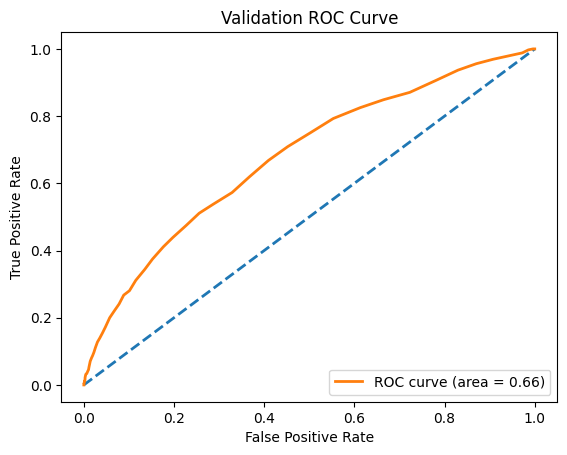

In [ ]:
from sklearn.metrics import roc_curve
#lr = LogisticRegression(solver='newton-cg', class_weight='balanced')
lr = RandomForestClassifier(n_estimators=100, random_state=42)
lr.fit(X_train, y_train)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
#val_auc = cross_val_score(lr, X_val, y_val, scoring='roc_auc', cv=cv).mean()
test_auc = cross_val_score(lr, X_test, y_test, scoring='roc_auc', cv=cv).mean()

#print('Validation AUC:', val_auc)
print('Test AUC:', test_auc)

test_prob = lr.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_prob)
#auc = metrics.auc(fpr_test, tpr_test)
# plot ROC vurve
plt.figure()
lw = 2
plt.plot([0,1],[0,1], lw = lw, linestyle = '--')
plt.plot(fpr_test, tpr_test, lw = lw, label='ROC curve (area = %0.2f)' % test_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Validation ROC Curve')
plt.legend(loc ="lower right")
plt.show()

### 绘制学习曲线，诊断模型

In [ ]:
Y.head()

0    1
1    0
2    0
3    0
4    0
Name: cvd_binary, dtype: int64

In [ ]:
from sklearn.model_selection import ShuffleSplit
# , scoring ="accuracy"
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes = np.linspace(.1, 1.0, 5), scoring ="accuracy"):
       '''绘制学习曲线
       '''
       plt.title(title)
       if ylim is not None:
             plt.ylim(*ylim)
       plt.xlabel('Training examples')
       plt.ylabel('Score')
       train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
       train_scores_mean = np.mean(train_scores, axis=1)
       train_scores_std = np.std(train_scores, axis=1)
       test_scores_mean = np.mean(test_scores, axis=1)
       test_scores_std = np.std(test_scores, axis=1)

       plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha =0.1,
                      color='r')
       plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha =0.1,
                      color='g' )
       plt.plot(train_sizes, train_scores_mean, "o-", color='r', label='Training score')
       plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
       plt.legend(loc='best')
       return plt

In [ ]:
Y.head()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

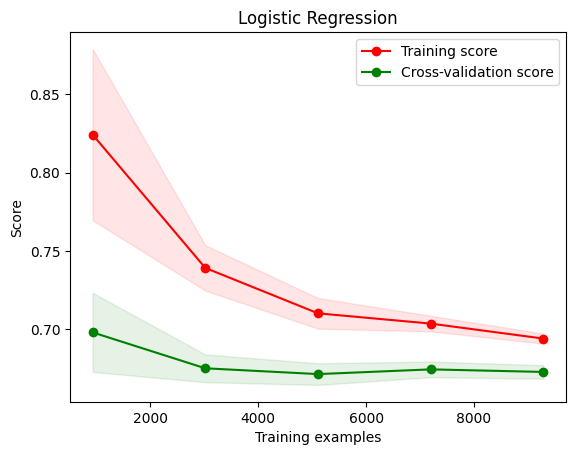

In [ ]:
# 学习曲线的绘制不可有缺失值
X, y = X_train, y_train
cv = ShuffleSplit(n_splits=5, test_size = 0.2, random_state=42)
titles = 'Logistic Regression'
# solver 决定了我们对逻辑回归损失函数的优化方法：# lbfgs,' newton_cg', 'liblinear', 'sag', 'saga'
estimator =  LogisticRegression(solver='liblinear', class_weight='balanced')
plot_learning_curve(estimator, titles, X_train, y_train, cv = cv, n_jobs = -1)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

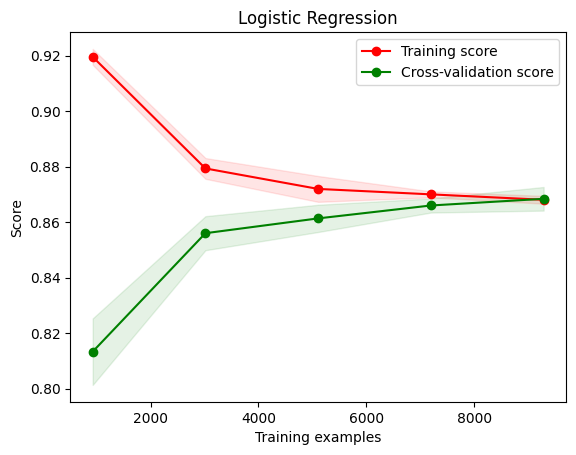

In [ ]:
X, y = X_train, y_train
cv = ShuffleSplit(n_splits=5, test_size = 0.2, random_state=42)
titles = 'Logistic Regression'
# solver 决定了我们对逻辑回归损失函数的优化方法：# lbfgs,' newton_cg', 'liblinear', 'sag', 'saga'
estimator =  LinearDiscriminantAnalysis()
#estimetor = GradientBoostingClassifier()
plot_learning_curve(estimator, titles, X_train, y_train, cv = cv, n_jobs = -1)

In [ ]:
# load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


### 特征选择方法一：采用extratree选择特征

In [ ]:
## ExtraTreesClassifier 它将森林中收集的多个去相关决策树的结果聚集起来输出分类结果
clf = ExtraTreesClassifier(n_estimators=250,
                              random_state=SEED)

clf.fit(X_train, y_train)

# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_idx_30 = sorted_idx[0:30]
pos = np.arange(sorted_idx.shape[0]) + .5
pos_30 = pos[0:30]


In [ ]:
df_update5.columns[sorted_idx]

Index(['MI', 'DIABTRT', 'sbp', 'age', 'glu', 'CABG', 'PHYSFUN', 'hdl',
       'REVASC', 'tg',
       ...
       'ALZHEIM', 'LIVERCA', 'THYRCA', 'LFDIETF2', 'PARKINS', 'ESTR', 'ALS',
       'HARDSTDY', 'SCANEMIA', 'DIALYSIS'],
      dtype='object', length=295)

In [ ]:
# 构建排序后的特征
sortindex = np.argsort(clf.feature_importances_)[::-1]
feature_index = []
for i in sortindex:
  if clf.feature_importances_[i] > 0.005:
      feature_index.append(df_update5.columns[i])
      print('%s\t%.5f'%(df_update5.columns[i], clf.feature_importances_[i]))

MI	0.00831
DIABTRT	0.00770
sbp	0.00727
age	0.00715
glu	0.00693
CABG	0.00621
PHYSFUN	0.00606
hdl	0.00594
REVASC	0.00591
tg	0.00591
GENHLTH	0.00583
GENHEL	0.00581
HYPT	0.00571
dbp	0.00569
hsCRP	0.00566
insu	0.00559
INCOME	0.00550
myhei	0.00544
PACKYRS	0.00541
SCORE_inso_all_group	0.00541
EDUC	0.00538
PAIN	0.00538
bmi	0.00537
HOSTIL	0.00531
SCORE_baseline_sleep_p0.05_0.05	0.00527
MENO	0.00525
ENERFAT	0.00522
CARDCATH	0.00521
sugar_pct	0.00518
HTNTRT	0.00518
hei	0.00518
SMOKING	0.00513
baseline_sugar	0.00513
SOCSUPP	0.00511
CUPREG	0.00504
PREGNUM	0.00503
OPTIMISM	0.00503
EMOWELL	0.00503
PREG6MN	0.00502
chol	0.00501
ANYMENSA	0.00500


In [ ]:
feature_index

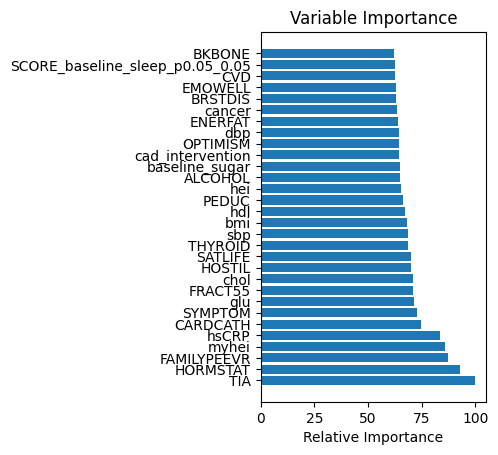

In [ ]:
plt.subplot(1, 2, 2)
plt.barh(pos_30, feature_importance[sorted_idx_30], align='center')
plt.yticks(pos_30, df_update4.columns[sorted_idx_30], fontsize =10)#boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Test AUC: 0.6853234584236647


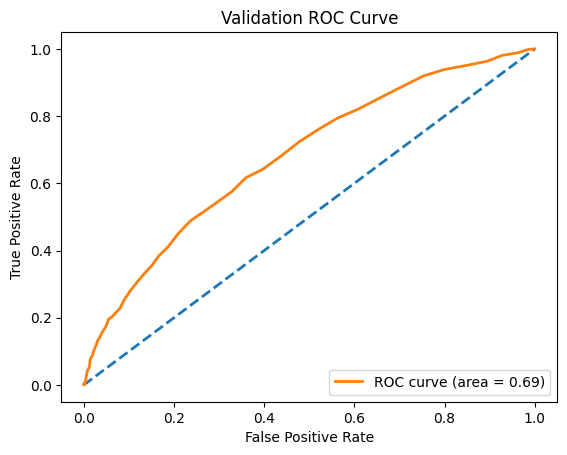

In [ ]:
lr = RandomForestClassifier(n_estimators=100, random_state=42)
lr.fit(X_train[feature_index], y_train)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
#val_auc = cross_val_score(lr, X_val, y_val, scoring='roc_auc', cv=cv).mean()
test_auc = cross_val_score(lr, X_test[feature_index], y_test, scoring='roc_auc', cv=cv).mean()

#print('Validation AUC:', val_auc)
print('Test AUC:', test_auc)

test_prob = lr.predict_proba(X_test[feature_index])[:, 1]
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_prob)
#auc = metrics.auc(fpr_test, tpr_test)
# plot ROC vurve
plt.figure()
lw = 2
plt.plot([0,1],[0,1], lw = lw, linestyle = '--')
plt.plot(fpr_test, tpr_test, lw = lw, label='ROC curve (area = %0.2f)' % test_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Validation ROC Curve')
plt.legend(loc ="lower right")
plt.show()

In [ ]:
# Building Decision Tree Model
# create Decision Tree classifer object
Tree = DecisionTreeClassifier(random_state=0)

# train decision tree classifer
Tree.fit(X_train, y_train)
features = X_train.columns
# 交叉验证评估
score1 = cross_val_score(Tree, X_train, y_train, cv = 5).mean()
score2 = Tree.score(X_test, y_test)
print(score1)
print(score2)
# 查看数据集分布是否平衡，如不平衡，可以采用sample_weight设置
y_train.value_counts()

0.7736626544353121
0.7753666867590918


0    10022
1     1589
Name: cvd_binary, dtype: int64

In [ ]:
# 选择2: 采用网格搜索调整参数
param = {'max_depth':[*range(1,10)],
         'splitter':('best','random'),
         'criterion':('gini','entropy'),
         'min_impurity_decrease':[*np.linspace(0,0.5,20)],
         'min_samples_leaf':[*range(1,50,5)] # 2
         }
Tree = DecisionTreeClassifier(random_state=0)
GS = GridSearchCV(Tree, param, cv=5)
GS.fit(X_train, y_train)
print(GS.best_params_)
print(GS.best_score_)

### 2023-06-11 特征选择方法二： 采用feature selector 选择特征

In [ ]:
!git clone https://github.com/WillKoehrsen/feature-selector.git

Cloning into 'feature-selector'...
remote: Enumerating objects: 144, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 144 (delta 35), reused 27 (delta 27), pack-reused 97
Receiving objects: 100% (144/144), 5.07 MiB | 24.84 MiB/s, done.
Resolving deltas: 100% (54/54), done.


In [ ]:
%cd feature-selector

/content/feature-selector


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score, auc
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from imblearn.over_sampling import SMOTE
from feature_selector import FeatureSelector

In [ ]:
fs = FeatureSelector(data=X_train, labels=y_train)
fs.identify_missing(missing_threshold=0.5)
fs.identify_zero_importance(task='classification', eval_metric='auc', n_iterations=10, early_stopping=True)
fs.identify_low_importance(cumulative_importance = 0.99)
fs.identify_collinear(correlation_threshold=0.8)
selected_features = fs.check_removal()
print('Selected features:', selected_features)

0 features with greater than 0.50 missing values.

Training Gradient Boosting Model


66 features with zero or negative importance after one-hot encoding.

213 features required for cumulative importance of 0.99 after one hot encoding.
124 features do not contribute to cumulative importance of 0.99.

34 features with a correlation magnitude greater than 0.80.

Total of 139 features identified for removal
Selected features: ['KIDNEYST', 'PANCREAT', 'SMINWK', 'F45STRES', 'HORMNW_0.0', 'OSTEOBK_1', 'ALC12DR', 'OTHDIET', 'SEPIWK', 'SKIN_F2_1', 'MALDIET_0.0', 'ENDO_F2_0.0', 'ALCSWK', 'COLN_F30', 'BRCA_F2_1', 'PE_0.0', 'OTHCA10Y_0.0', 'BLDPROB_0.0', 'TOTH', 'PREG', 'BRSTDIS', 'COLON_F2_0.0', 'OTHCA10Y_1', 'PREG6MN', 'TEXPWK', 'MI_0.0', 'F45MOLYB', 'MALDIET_1', 'DIALYSIS', 'HORMNW_1', 'LEPITOT', 'BLDPROB_1', 'PARKINS', 'TMINWK', 'ABNPAP3Y', 'TEST', 'BRTHLIVN', 'ASTHMA', 'HIBLDCA', 'HYST_0.0', 'MELN_F30', 'LFDIETF2_0.0', 'HARDEXP', 'FULLTRMR', 'baseline_sfa', 'HTNTRT', 'chol', 'LFDIETF2_1', 'B

In [ ]:
#selected_features.remove('CHF_F2_1')
#selected_features.remove('CHF_F2_0.0')
#selected_features.remove('MALDIET_0.0')
selected_features.remove('ENDO_F2_0.0')
selected_features.remove('ENDO_F2_1')
selected_features.remove('PE_0.0')
selected_features.remove('PE_1')
selected_features.remove('BLDPROB_1')
selected_features.remove('BLDPROB_0.0')
selected_features.remove('OTHCA10Y_0.0')
selected_features.remove('BRCA_F2_0.0')
selected_features.remove('HYST_0.0')
selected_features.remove('STROKE_0.0')
#selected_features.remove('STROKE_1')
selected_features.remove('MELAN_F2_1')
selected_features.remove('COMECC_1')
selected_features.remove('COMECC_0.0')
selected_features.remove('HORM_1')
selected_features.remove('LIVERDIS_1')
selected_features.remove('LIVERDIS_0.0')
selected_features.remove('DVT_1')
selected_features.remove('DVT_0.0')
selected_features.remove('HORMSTAT_0.0')
selected_features.remove('MELAN_F2_0.0')
selected_features.remove('TIA_1')
selected_features.remove('OSTEOBK_0.0')
selected_features.remove('DIABTRT_0.0')
selected_features.remove('SKIN_F2_0.0')
selected_features.remove('L15LBS6M_0.0')
selected_features.remove('LFDIETF2_0.0')

#selected_features.append('fat_down')
selected_features

In [ ]:
selected_features.remove('HORMNW_0.0')
selected_features.remove('OSTEOBK_1')

In [ ]:
selected_features

In [ ]:

rf = RandomForestClassifier(n_estimators=100, random_state=42)
param_test1 = {'n_estimators':  range(20, 120, 10)}
gsearch1 = GridSearchCV(estimator=RandomForestClassifier(min_samples_split=300,
                                                        min_samples_leaf=20, max_depth=8,
                                                         max_features="sqrt", random_state=42),
                        param_grid = param_test1, scoring = 'roc_auc', cv=5)
gsearch1.fit(X_train[selected_features], y_train)
gsearch1.best_params_, gsearch1.best_score_

In [ ]:
# 2023-06-11 feature selector选的特征预测效果较差

### 2023-06-11 特征选择方法三：基于lasso的特征选择



In [ ]:
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=5))
    return(rmse)

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV, LinearRegression
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005], selection='random', max_iter=15000).fit(X_train, y_train)
res = rmse_cv(model_lasso)
print("Mean:",res.mean())
print("Min: ",res.min())

Mean: 0.33674633988630076
Min:  0.32575245505562905


In [ ]:
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 181 variables and eliminated the other 114 variables


In [ ]:
feature1= coef.sort_values().head(25).index
feature1

Index(['MIGRAINE', 'SMOKEVR', 'DIVERTIC', 'LIFTGROC', 'COFFEE', 'OC',
       'JOBTECH', 'TOTP', 'WALKMIN', 'F45COMBP', 'XLMSEPI', 'dm_trial',
       'LFATDIET', 'NOTWRK', 'SEPIWK', 'SATLIFE', 'HEMOCCDT', 'KIDNEYST',
       'COLNSCPY', 'WALK', 'OTHWRK', 'HLTHC1Y', 'BRSTFDMO', 'BKBONDAD',
       'BKBONREL'],
      dtype='object')

In [ ]:
lasso_features = coef[coef!= 0].index
lasso_features

Index(['SCORE_baseline_sleep_p0.05_0.05', 'baseline_sugar', 'baseline_sleep',
       'baseline_tot_cal', 'baseline_fat', 'baseline_pro', 'baseline_cho',
       'baseline_sfa', 'baseline_mufa', 'baseline_pufa',
       ...
       'HOSTIL', 'GENHLTH', 'LFEVENT1', 'NEGEMOT', 'OPTIMISM', 'PAIN',
       'SLPDSTRB', 'SOCFUNC', 'SOCSUPP', 'PHYSFUN'],
      dtype='object', length=181)

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

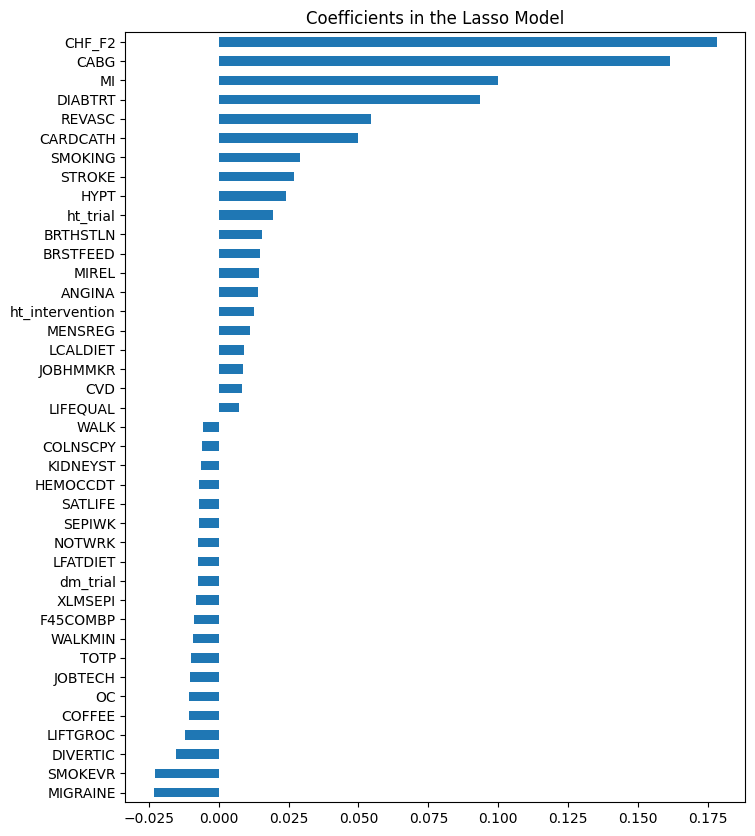

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
import matplotlib.font_manager

# plotting feature importances
imp_coef = pd.concat([coef.sort_values().head(30),
                      coef.sort_values().tail(30)])
matplotlib.rcParams['figure.figsize'] = (8,10)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

Test AUC: 0.6682086389937858


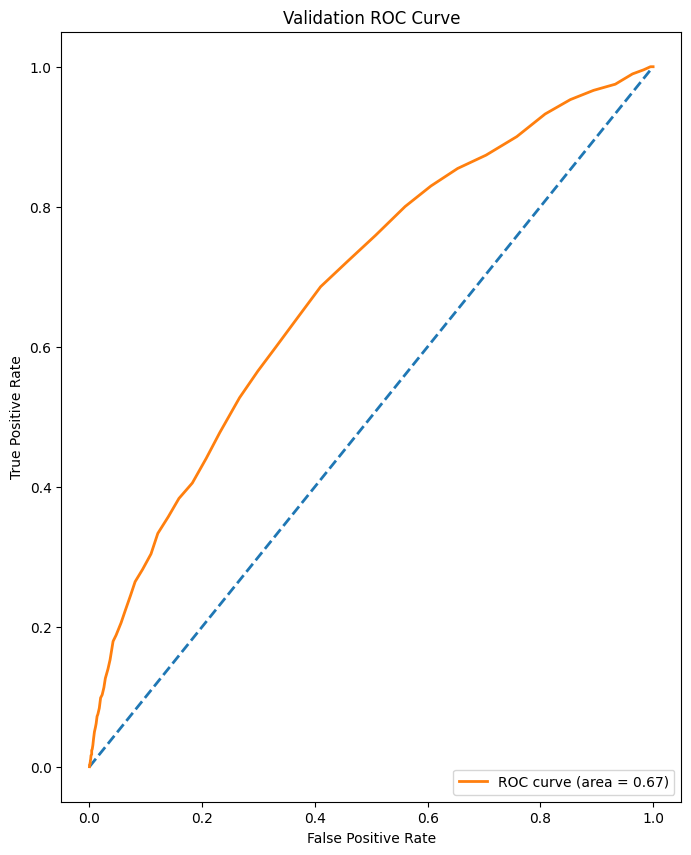

In [ ]:
lr = RandomForestClassifier(n_estimators=100, random_state=42)
lr.fit(X_train[lasso_features], y_train)
cv = KFold(n_splits=5, shuffle=True, random_state=42)
#val_auc = cross_val_score(lr, X_val, y_val, scoring='roc_auc', cv=cv).mean()
test_auc = cross_val_score(lr, X_test[lasso_features], y_test, scoring='roc_auc', cv=cv).mean()

#print('Validation AUC:', val_auc)
print('Test AUC:', test_auc)

test_prob = lr.predict_proba(X_test[lasso_features])[:, 1]
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_prob)
#auc = metrics.auc(fpr_test, tpr_test)
# plot ROC vurve
plt.figure()
lw = 2
plt.plot([0,1],[0,1], lw = lw, linestyle = '--')
plt.plot(fpr_test, tpr_test, lw = lw, label='ROC curve (area = %0.2f)' % test_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Validation ROC Curve')
plt.legend(loc ="lower right")
plt.show()

### 2023-05-31搜索GBM算法最优参数，并组合

In [ ]:
# 调GBM的参数
gbm0 = GradientBoostingClassifier(random_state=10)

num_folds = 10
  # score 的类型可以选择"accuracy"，"roc_auc", "f1", "precesion", "recall"
scoring = "roc_auc"
results = []
names = []
  # StratifiedKFold 保证训练集中每一类的比例是相同的,其中参数含义：n_splits为折叠次数,shuffle: 是否在每次分割之前打乱顺序
  # cross_val_score 为交叉验证函数，其中参数含义，cv为每次选择验证折数
kfold = StratifiedKFold(n_splits=num_folds, random_state=SEED,shuffle=True)
cv_results = cross_val_score(gbm0, X_train[lasso_features], y_train, cv=kfold, scoring=scoring)
print(cv_results)

[0.68405475 0.73655615 0.71945417 0.72890069 0.67092858 0.68826498
 0.74965164 0.71327157 0.74982111 0.68427924]


In [ ]:
param_test1 = {'n_estimators':  range(20, 81, 10)}
gsearch1 = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.1, min_samples_split=300,
                                                             min_samples_leaf=20, max_depth=8, max_features="sqrt", subsample=0.8,random_state=10),
                        param_grid = param_test1, scoring = 'roc_auc', cv=5)
gsearch1.fit(X_train[lasso_features], y_train)
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 50}, 0.7008571763720539)

In [ ]:
param_test2 = {'max_depth':range(3,14,2), 'min_samples_split':range(100, 801, 200)}
gsearch2 = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.1,n_estimators=50,
                                                             min_samples_leaf=20,  max_features="sqrt", subsample=0.8,random_state=10),
                        param_grid = param_test2, scoring = 'roc_auc', cv=5)
gsearch2.fit(X_train[lasso_features], y_train)
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 5, 'min_samples_split': 700}, 0.7097842096639839)

In [ ]:
param_test3 = {'min_samples_split':range(300, 1000, 50), 'min_samples_leaf':range(60, 101, 10)}
gsearch3 = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.1,n_estimators=30, max_depth=5,
                                                             max_features="sqrt", subsample=0.8,random_state=10),
                        param_grid = param_test3, scoring = 'roc_auc', cv=5)
gsearch3.fit(X_train[lasso_features], y_train)
gsearch3.best_params_, gsearch3.best_score_

({'min_samples_leaf': 70, 'min_samples_split': 450}, 0.7058386186254769)

In [ ]:
gsearch4 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=30, max_depth=5,
                                                        min_samples_split = 450,  max_features="sqrt",
                                                        subsample=0.8,random_state=10,
                                                        min_samples_leaf = 70)
gsearch4.fit(X_train[lasso_features], y_train)
y_pred = gsearch4.predict(X_test[lasso_features])
y_predprob = gsearch4.predict_proba(X_test[lasso_features])[:,1]
print  ("AUC Score (Train): %f" % metrics.roc_auc_score(y_test, y_predprob))

AUC Score (Train): 0.704336


### 2023-06-13 XGB model 基于sklearn接口

In [ ]:
from sklearn.datasets import load_iris
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
X_train.dtypes

SCORE_baseline_sleep_p0.05_0.05    float64
sugar_pct                          float64
baseline_sugar                     float64
SCORE_inso_all_group               float64
baseline_sleep                     float64
                                    ...   
SYMPTOM                            float64
PHYSFUN                            float64
delta_sleep                        float64
delta_ces_d                        float64
foup_ces_d                         float64
Length: 295, dtype: object

In [ ]:
for i in C_index:
  X_train[i] = X_train[i].astype('category')

In [ ]:
X_train['MI'].value_counts()

0.0    11265
1        345
0.0        1
Name: MI, dtype: int64

In [ ]:
pip install category-encoders

In [ ]:
from category_encoders import *
import pandas as pd

In [ ]:
C_index = C_index + ['CHF_F2','OTHCHRON','DIABTRT','HORMNW','OSTEOBK','LIVERDIS','COMECC']

In [ ]:
# use target encoding to encode two categorical features
enc = TargetEncoder(cols=C_index)

# transform the datasets
training_numeric_dataset = enc.fit_transform(X_train, y_train)
testing_numeric_dataset = enc.transform(X_test)

In [ ]:
testing_numeric_dataset.head()

,SCORE_baseline_sleep_p0.05_0.05,sugar_pct,baseline_sugar,SCORE_inso_all_group,baseline_sleep,baseline_tot_cal,baseline_fat,baseline_pro,baseline_cho,baseline_sfa,baseline_mufa,baseline_pufa,baseline_alc,baseline_palm,baseline_n3,hei,myhei,age,BRCA_F2,COLON_F2,ENDO_F2,SKIN_F2,MELAN_F2,OTHCA10Y,HORM,HORMNW,OSTEOBK,HYST,MALDIET,LFDIETF2,DVT,PE,STROKE,TIA,MI,SCANEMIA,CHF_F2,LIVERDIS,BLDPROB,L15LBS6M,DIALYSIS,OTHCHRON,HARDSTDY,COMECC,HORMSTAT,DIABTRT,dm_trial,dm_intervention,ht_trial,ht_intervention,cad_trial,cad_intervention,EDUC,NOTWRK,RETIRED,HOMEMKR,EMPLOYED,DISABLED,OTHWRK,JOBHMMKR,JOBMANGR,JOBTECH,JOBSERV,JOBLABOR,JOBOTH,MARITAL,PEDUC,INCOME,CAREPROV,ABNPAP3Y,CERVDYS,MAINJOB,HOSP2Y,GLAUCOMA,CATARACT,HICHOLRP,ASTHMA,EMPHYSEM,KIDNEYST,HIBLDCA,STOMULCR,DIVERTIC,COLITIS,LUPUS,PANCREAT,OSTEOPOR,HIPREP,OTHJREP,INTESTRM,MIGRAINE,...,WALKEXP,SMOKING,HARDEXP,MODEXP,MILDEXP,AVWKEXP,FFWKEXP,VFWKEXP,ALCSWK,ALCOHOL,PACKYRS,PACKYRSC,FAMILYDVTEVR,FAMILYPEEVR,sbp,dbp,bmi,hsCRP,glu,hdl,insu,ldl,chol,tg,RECENCY,OC,DES,DMPA,TOTE,TOTP,TOTH,TEST,ESTR,F45VITA,F45VITE,F45VITB1,F45VTB12,F45VITB2,F45VITB6,F45BETA,F45BIOT,F45VITC,F45CALC,F45CHROM,F45COPP,F45VITD,F45FOLIC,F45IRON,F45MAGN,F45MANG,F45MOLYB,F45NIAC,F45PANTO,F45RETIN,F45SELEN,F45ZINC,F45MULTI,F45MVMIN,F45STRES,F45OTHCM,F45COMBP,F45CALCY,LIFEQUAL,SATLIFE,GENHEL,HLTHC1Y,VIGACT,MODACT,LIFTGROC,HRSSLP,EMOLIMIT,EMOWELL,ENERFAT,HOSTIL,GENHLTH,LFEVENT1,LIVALOR,NEGEMOT,OPTIMISM,PAIN,PSHTDEP,SLPDSTRB,SOCFUNC,SOCSTRN,SOCSUPP,SYMPTOM,PHYSFUN,delta_sleep,delta_ces_d,foup_ces_d
7946,552.288,0.287331,192.46341,0.000141,6.0,2679.32740,113.37009,74.54955,343.24776,33.47827,47.58294,24.96390,2.89581,17.42050,2.53818,54.20569,-0.001854,64,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.127918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.126416,0,0,1,1,1,0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,7.0,3.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.25,1.0,0.0,6.75,0.0,5.25,0.0,0.0,1.26923,5.0,15.000,2.0,1.0,0.0,132.0,75.0,37.328570,5.28,89.0,43.0,80.0,159.0,222.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,8.387596,7.0,4.0,3.0,2.0,1.0,3.0,3.0,3.0,100.00000,80.0,35.0,3.574517,60.0,3.0,1.0,2.00,21.0,62.5,0.02123,6.0,100.0,6.0,45.0,0.41176,65.0,8.000000,-0.018730,0.002500
7888,544.366,0.181294,82.43258,0.000190,8.0,1818.76210,64.73266,52.50710,237.68220,16.41572,27.39152,16.11583,17.26711,9.18565,1.83758,73.34849,0.000860,53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.127918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.126416,0,0,1,0,1,1,10.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5.0,10.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.50,1.0,7.0,31.50,21.0,7.50,0.0,0.0,7.44231,6.0,12.500,2.0,9.0,1.0,122.0,78.0,28.395698,0.16,84.0,53.7,32.0,131.0,201.0,82.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,8.387596,8.0,8.0,1.0,3.0,2.0,3.0,3.0,3.0,100.00000,76.0,70.0,0.000000,100.0,3.0,0.0,3.00,20.0,87.5,0.08181,8.0,100.0,7.0,35.0,0.82353,90.0,3.000000,-0.080080,0.001730
16577,555.529,0.278798,82.89318,0.000175,13.0,1189.29587,35.71705,41.82453,185.86029,11.69391,12.89745,8.09123,0.01557,6.22557,1.28022,78.80420,0.000569,76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.127918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.126416,0,0,1,0,0,0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,5.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.75,0.0,0.0,0.00,7.0,3.75,0.0,0.0,0.00000,2.0,0.000,0.0,0.0,0.0,156.0,72.0,19.153410,0.85,129.0,58.0,35.0,173.0,251.0,101.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1800.0,430.0,1.5,6.0,1.7,2.0,5400.0,0.0,120.0,648.571,0.0,2.0,10.0,400.0,18.0,100.0,0.0,0.0,20.0,0.0,900.0,10.0,1

In [ ]:
y_train.value_counts()

0    10022
1     1589
Name: cvd_binary, dtype: int64

[08:51:05] WARNING: ../src/learner.cc:767: 
Parameters: { "nrounds" } are not used.

accuracy:86%


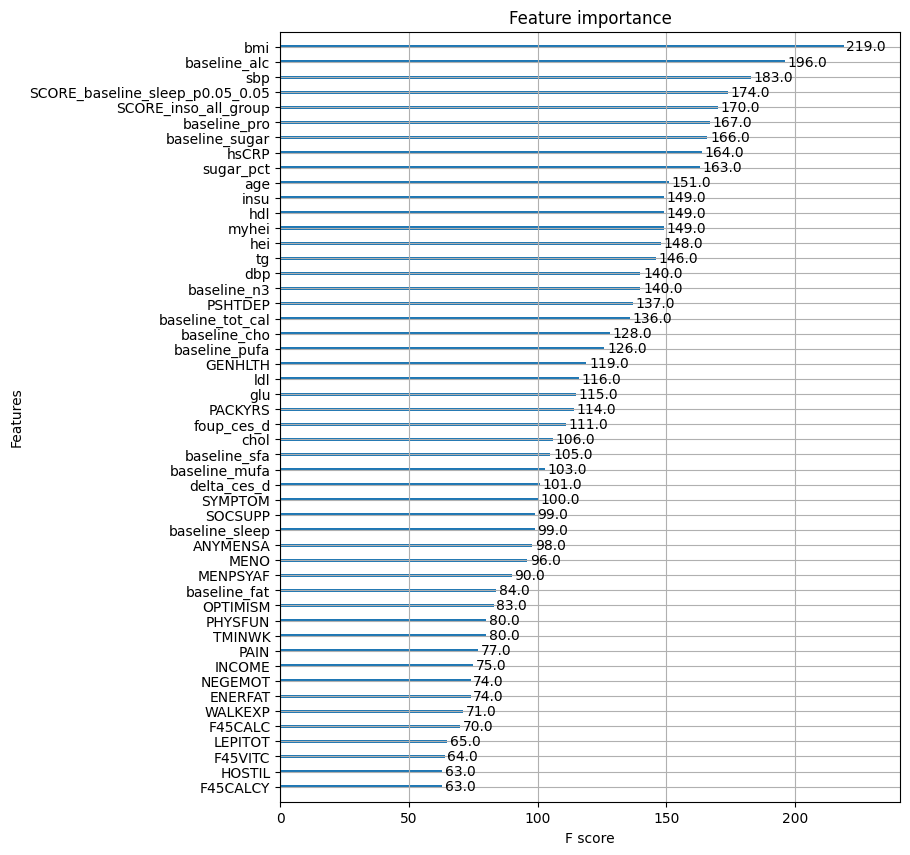

In [ ]:
# 训练模型
model = xgb.XGBClassifier(eta=0.1, nrounds=1000, max_depth=8, colsample_bytree=0.5, scale_pos_weight=1.1, objective='binary:logistic',booster='gbtree')
model.fit(training_numeric_dataset, y_train)

# 对测试集进行预测
y_pred = model.predict(testing_numeric_dataset)

#计算准确率
accuracy = accuracy_score(y_test,y_pred)
print('accuracy:%2.f%%'%(accuracy*100))

# 显示重要特征
plot_importance(model, max_num_features=50)
plt.show()

AUC Score (Train): 0.685911


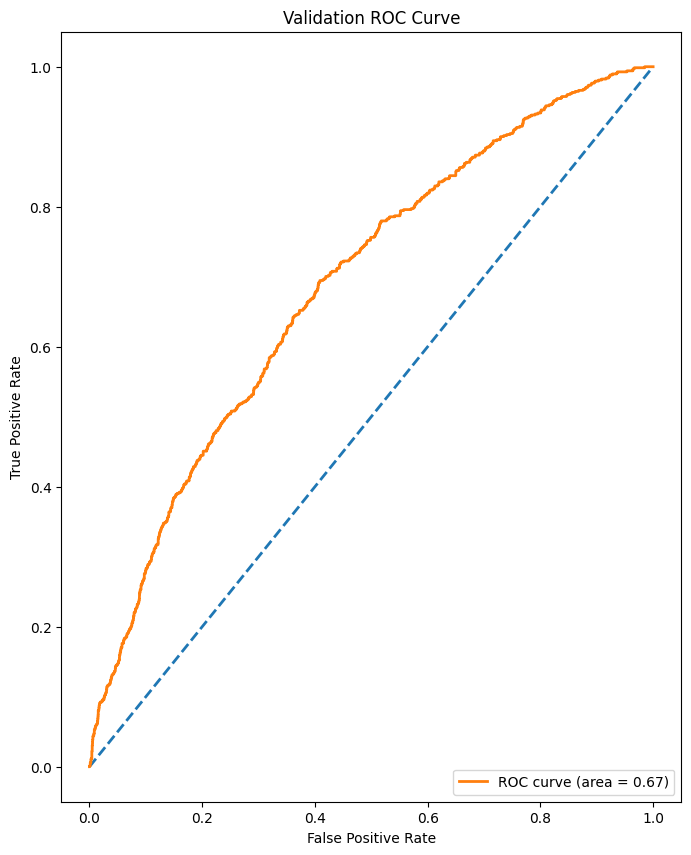

In [ ]:
#计算AUC
y_pred = model.predict(testing_numeric_dataset)
y_predprob = model.predict_proba(testing_numeric_dataset)[:,1]
print  ("AUC Score (Train): %f" % metrics.roc_auc_score(y_test, y_predprob))

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_predprob)
#auc = metrics.auc(fpr_test, tpr_test)

# plot ROC vurve
plt.figure()
lw = 2
plt.plot([0,1],[0,1], lw = lw, linestyle = '--')
plt.plot(fpr_test, tpr_test, lw = lw, label='ROC curve (area = %0.2f)' % test_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Validation ROC Curve')
plt.legend(loc ="lower right")
plt.show()

### 2023-06-13 XGB模型调参

In [ ]:
## 定义XGB函数
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
  if useTrainCV:
    xgb_param = alg.get_xgb_params()
    xgtrain = xgb.DMatrix(dtrain[predictors].values, label=y_train.values)
    cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
        metrics='auc', early_stopping_rounds=early_stopping_rounds)
    alg.set_params(n_estimators=cvresult.shape[0])

#Fit the algorithm on the data
    alg.fit(dtrain[predictors], y_train, eval_metric='auc')

#Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]

#Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(y_train.values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))


In [ ]:
predictors = training_numeric_dataset.columns
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
modelfit(xgb1, training_numeric_dataset, predictors)


Model Report
Accuracy : 0.8823
AUC Score (Train): 0.886614


In [ ]:
param_test1 = {'max_depth':range(3,10,2),'min_child_weight':range(1,6,2)}
gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1,
                                                  n_estimators=140,
                                                  max_depth=5,
                                                  min_child_weight=1,
                                                  gamma=0,
                                                  subsample=0.8,
                                                  colsample_bytree=0.8,
                                                  objective= 'binary:logistic',
                                                  nthread=4,
                                                  scale_pos_weight=1,
                                                  seed=27),
                                                  param_grid = param_test1,
                                                  scoring='roc_auc',
                                                  n_jobs=4,
                                                  cv=5)
gsearch1.fit(training_numeric_dataset,y_train)
gsearch1.best_params_,gsearch1.best_score_


In [ ]:
gsearch1.best_params_,gsearch1.best_score_

({'max_depth': 3, 'min_child_weight': 3}, 0.7044071258244549)

In [ ]:
param_test2 = {
 'max_depth':[2,3,4],
 'min_child_weight':[2,3,4]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1,
                                                  n_estimators=140,
                                                  max_depth=3,
                                                  min_child_weight=3,
                                                  gamma=0,
                                                  subsample=0.8,
                                                  colsample_bytree=0.8,
                                                  objective= 'binary:logistic',
                                                  nthread=4,
                                                  scale_pos_weight=1,
                                                  seed=27),
                                                  param_grid = param_test2,
                                                  scoring='roc_auc',
                                                  n_jobs=4,
                                                  cv=5)
gsearch2.fit(training_numeric_dataset,y_train)
gsearch2.best_params_,gsearch2.best_score_


({'max_depth': 2, 'min_child_weight': 4}, 0.7115729602498027)

In [ ]:
param_test2b = {
 'min_child_weight':[5,6,8,10,12]
 }
gsearch2b = GridSearchCV(estimator = XGBClassifier(learning_rate=0.1,
                                                   n_estimators=140,
                                                   max_depth=2,
                                                   min_child_weight=4,
                                                   gamma=0,
                                                   subsample=0.8,
                                                   colsample_bytree=0.8,
                                                   objective= 'binary:logistic',
                                                   nthread=4,
                                                   scale_pos_weight=1,
                                                   seed=27),
                                                  param_grid = param_test2b,
                                                  scoring='roc_auc',
                                                  n_jobs=4,
                                                  cv=5)
gsearch2b.fit(training_numeric_dataset,y_train)
gsearch2b.best_params_,gsearch2b.best_score_


({'min_child_weight': 6}, 0.7122997226645995)

In [ ]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1,
                                                  n_estimators=140,
                                                  max_depth=2,
                                                  min_child_weight=6,
                                                  gamma=0,
                                                  subsample=0.8,
                                                  colsample_bytree=0.8,
                                                  objective= 'binary:logistic',
                                                  nthread=4,
                                                  scale_pos_weight=1,
                                                  seed=27),
                                                  param_grid = param_test3,
                                                  scoring='roc_auc',
                                                  n_jobs=4,
                                                  cv=5)

gsearch3.fit(training_numeric_dataset,y_train)
gsearch3.best_params_,gsearch3.best_score_


({'gamma': 0.0}, 0.7122997226645995)

In [ ]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}

gsearch4 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1,
                                                  n_estimators=177,
                                                  max_depth=2,
                                                  min_child_weight=6,
                                                  gamma=0.1,
                                                  subsample=0.8,
                                                  colsample_bytree=0.8,
                                                  objective= 'binary:logistic',
                                                  nthread=4,
                                                  scale_pos_weight=1,
                                                  seed=27),
                                                  param_grid = param_test4,
                                                  scoring='roc_auc',
                                                  n_jobs=4,
                                                  cv=5)

gsearch4.fit(training_numeric_dataset,y_train)
gsearch4.best_params_,gsearch4.best_score_


({'colsample_bytree': 0.6, 'subsample': 0.9}, 0.7122997226645995)

In [ ]:
gsearch4.best_score_

0.7123575908526059

In [ ]:
param_test5 = {
 'subsample':[i/100.0 for i in range(50,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}

gsearch5 = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1,
                                                  n_estimators=140,
                                                  max_depth=2,
                                                  min_child_weight=6,
                                                  gamma=0,
                                                  subsample=0.6,
                                                  colsample_bytree=0.9,
                                                  objective= 'binary:logistic',
                                                  nthread=4,
                                                  scale_pos_weight=1,
                                                  seed=27),
                                                  param_grid = param_test5,
                                                  scoring='roc_auc',
                                                  n_jobs=4,
                                                  cv=5)

gsearch5.fit(training_numeric_dataset,y_train)
gsearch5.best_params_,gsearch5.best_score_


({'colsample_bytree': 0.95, 'subsample': 0.85}, 0.713571735440406)

In [ ]:
gsearch6 = XGBClassifier(learning_rate =0.1,
                         n_estimators=170,
                         max_depth=2,
                         min_child_weight=6,
                         gamma=0,
                         subsample=0.85,
                         colsample_bytree=0.95,
                         objective= 'binary:logistic',
                         nthread=4,
                         scale_pos_weight=1,
                         seed=27)

gsearch6.fit(training_numeric_dataset,y_train)
y_pred = gsearch6.predict(testing_numeric_dataset)
y_predprob = gsearch6.predict_proba(testing_numeric_dataset)[:,1]
print  ("AUC Score (Test): %f" % metrics.roc_auc_score(y_test, y_predprob))

AUC Score (Test): 0.706679


### 2023-05-20

In [ ]:
# 导入和训练模型
lr = LogisticRegression(solver='liblinear', class_weight='balanced')
# 可选择的class_weight 有 balnaced, balanced_subsample,
## calculate weight Calculate weights using sklearn

LAD = LinearDiscriminantAnalysis()

# 对训练数据集进行标准化
ss = StandardScaler()
#X_train_new = X_train[['DBDIET34', 'REVASC', 'ANGINA', 'ht_trial', 'LCALDIET', 'HEMOCCDT', 'MSMINWK','SCORE_baseline_sleep_p0.05_0.05']]
X_train_new = ss.fit_transform(X_train)

# 拟合模型
lr.fit(X_train_new, y_train)
LAD.fit(X_train_new, y_train)

# 测试数据预测
pred_test = lr.predict(X_test)
pred_test_LAD = LAD.predict(X_test)

The f1 score for the testing data: 0.21882951653944022
The f1 score for the testing data: 0.21432537479178235
Classfication report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1535
           1       0.12      1.00      0.22       215

    accuracy                           0.12      1750
   macro avg       0.06      0.50      0.11      1750
weighted avg       0.02      0.12      0.03      1750

Classfication report: 
               precision    recall  f1-score   support

           0       0.87      0.09      0.17      1535
           1       0.12      0.90      0.21       215

    accuracy                           0.19      1750
   macro avg       0.49      0.50      0.19      1750
weighted avg       0.77      0.19      0.17      1750



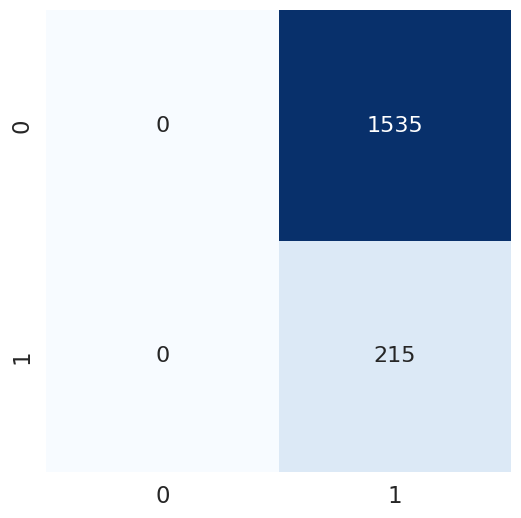

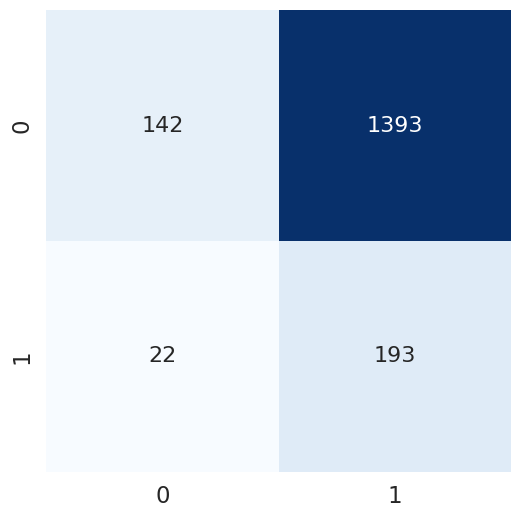

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight

# 创建混淆矩阵的函数
def conf_matrix(y_test, pred_test):
  # 创建混淆矩阵
  con_mat = confusion_matrix(y_test, pred_test)
  con_mat = pd.DataFrame(con_mat, range(2), range(2))

  plt.figure(figsize=(6,6))
  sns.set(font_scale=1.5)
  sns.heatmap(con_mat, annot=True, annot_kws={'size':16}, fmt='g',cmap='Blues', cbar=False)
# 调用函数

#计算并打印f1分数
f1_test = f1_score(y_test, pred_test)
print('The f1 score for the testing data:', f1_test)

f1_test_LAD = f1_score(y_test, pred_test_LAD)
print('The f1 score for the testing data:', f1_test_LAD)

# 绘制混淆矩阵
print('Classfication report: \n', classification_report(y_test, pred_test))
conf_matrix(y_test, pred_test)

print('Classfication report: \n', classification_report(y_test, pred_test_LAD))
conf_matrix(y_test, pred_test_LAD)


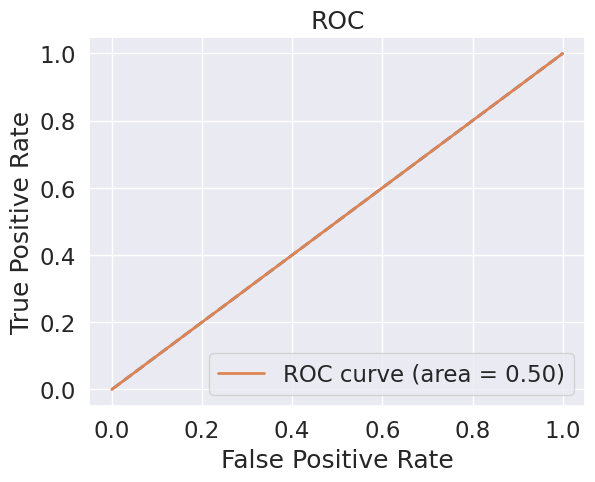

In [ ]:
# 绘制AUC-ROC曲线
# ROC Curve with logistic regression
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
y_pred = lr.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = metrics.auc(fpr, tpr)
# plot ROC vurve
plt.figure()
lw = 2
plt.plot([0,1],[0,1], lw = lw, linestyle = '--')
plt.plot(fpr, tpr, lw = lw, label = 'ROC curve (area = %0.2f)' % auc)
plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc ="lower right")
plt.show()

In [ ]:
#LDA solver="eigen" lsqr
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

def GetScaledModel(nameOfScaler):

    if nameOfScaler == 'standard':
        scaler = StandardScaler()
    elif nameOfScaler =='minmax':
        scaler = MinMaxScaler()

    pipelines = []
    pipelines.append((nameOfScaler+'_LR'  , Pipeline([('Scaler', scaler),('LR'  , LogisticRegression(solver='liblinear', class_weight = "balanced"))])))
    pipelines.append((nameOfScaler+'_LDA' , Pipeline([('Scaler', scaler),('LDA' , LinearDiscriminantAnalysis())])))
    pipelines.append((nameOfScaler+'_KNN' , Pipeline([('Scaler', scaler),('KNN' , KNeighborsClassifier())])))
    pipelines.append((nameOfScaler+'_CART', Pipeline([('Scaler', scaler),('CART', DecisionTreeClassifier())])))
    pipelines.append((nameOfScaler+'_NB'  , Pipeline([('Scaler', scaler),('NB'  , GaussianNB())])))
    pipelines.append((nameOfScaler+'_SVM' , Pipeline([('Scaler', scaler),('SVM' , SVC())])))
    pipelines.append((nameOfScaler+'_AB'  , Pipeline([('Scaler', scaler),('AB'  , AdaBoostClassifier())])  ))
    pipelines.append((nameOfScaler+'_GBM' , Pipeline([('Scaler', scaler),('GMB' , GradientBoostingClassifier())])  ))
    pipelines.append((nameOfScaler+'_RF'  , Pipeline([('Scaler', scaler),('RF'  , RandomForestClassifier())])  ))
    pipelines.append((nameOfScaler+'_ET'  , Pipeline([('Scaler', scaler),('ET'  , ExtraTreesClassifier())])  ))


    return pipelines

In [ ]:
####
# Spot-Check Algorithms
# LR, LDA#(solver="eigen") lsqr, NB 三种模型的RECALL还可以，可以考虑重点关注该三种模型，采用FOR循环调参
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR'   , LogisticRegression(solver='liblinear', class_weight='balanced')))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN'  , KNeighborsClassifier()))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM'  , SVC(probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier()))
    basedModels.append(('RF'   , RandomForestClassifier()))
    basedModels.append(('ET'   , ExtraTreesClassifier()))


    return basedModels
def BasedLine2(X_train, y_train, models):
  # Test options and evaluation metric
  num_folds = 10
  # score 的类型可以选择"accuracy"，"roc_auc", "f1", "precesion", "recall"
  scoring = "roc_auc"
  results = []
  names = []
  # StratifiedKFold 保证训练集中每一类的比例是相同的,其中参数含义：n_splits为折叠次数,shuffle: 是否在每次分割之前打乱顺序
  # cross_val_score 为交叉验证函数，其中参数含义，cv为每次选择验证折数
  for name, model in models:
    kfold = StratifiedKFold(n_splits=num_folds, random_state=SEED,shuffle=True)
    cv_results = cross_val_score(model, X_test, y_test, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
  return names, results
##
class PlotBoxR(object):


    def __Trace(self,nameOfFeature,value):

        trace = go.Box(
            y=value,
            name = nameOfFeature,
            marker = dict(
                color = 'rgb(0, 128, 128)',
            )
        )
        return trace

    def PlotResult(self,names,results):
        data = []

        for i in range(len(names)):
            data.append(self.__Trace(names[i],results[i]))
        py.iplot(data)


In [ ]:
models = GetBasedModel()
names,results = BasedLine2(X_train[lasso_features], y_train, models)

LR: 0.616795 (0.079786)
LDA: 0.607886 (0.072960)
KNN: 0.488653 (0.050678)
CART: 0.555205 (0.049600)
NB: 0.596911 (0.077432)
SVM: 0.521903 (0.045672)
AB: 0.594475 (0.094086)
GBM: 0.653445 (0.090212)
RF: 0.666196 (0.091727)
ET: 0.631381 (0.108794)


In [ ]:
models = GetScaledModel('standard')
names,results = BasedLine2(X_train, y_train, models)
PlotBoxR().PlotResult(names, results)

standard_LR: 0.653767 (0.037981)
standard_LDA: 0.659287 (0.040010)
standard_KNN: 0.570108 (0.047447)
standard_CART: 0.541393 (0.033225)
standard_NB: 0.527949 (0.042042)
standard_SVM: 0.640819 (0.027782)
standard_AB: 0.644553 (0.035426)
standard_GBM: 0.678633 (0.034595)
standard_RF: 0.652321 (0.043223)
standard_ET: 0.652246 (0.033494)


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform
class RandomSearch(object):

    def __init__(self,X_train,y_train,model,hyperparameters):

        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters

    def RandomSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = RandomizedSearchCV(self.model,
                                 self.hyperparameters,
                                 random_state=1,
                                 n_iter=100,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_

    def BestModelPridict(self,X_test):

        best_model,_ = self.RandomSearch()
        pred = best_model.predict(X_test)
        return pred
class GridSearch(object):

    def __init__(self,X_train,y_train,model,hyperparameters):

        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters

    def GridSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = GridSearchCV(self.model,
                                 self.hyperparameters,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_

    def BestModelPridict(self,X_test):

        best_model,_ = self.GridSearch()
        pred = best_model.predict(X_test)
        return pred

In [ ]:
# Hyperparameters estimate by using gridsearch method
### 1. LOGISTIC REGRESSION model
model = LogisticRegression(solver='newton-cg', class_weight='balanced')
# Create regularization penalty space
penalty = ['l1', 'l2']
# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4)
# Create hyperparameter options
solver = ['lbfgs',' newton_cg', 'liblinear', 'sag', 'saga']
hyperparameters = dict(solver=solver, C=C, penalty=penalty)
#
LR_RandSearch = RandomSearch(X_train,y_train,model,hyperparameters)
# LR_best_model,LR_best_params = LR_RandSearch.RandomSearch()
Prediction_LR = LR_RandSearch.BestModelPridict(X_test)

Best: 0.643301 using {'C': 3.730229437354635, 'penalty': 'l2'}
